# **数据处理上是否需要用Dask Dataframe**

##  **Dask DataFrame 和 Pandas DataFrame 都是用于数据处理和分析的强大工具，但它们在设计理念、处理能力和使用场景上有一些重要区别。以下是它们之间的主要区别：**

<details>
    <summary>点击展开/折叠详细信息</summary>

### 设计理念

- **Pandas DataFrame**：
  - 设计用于处理和分析内存中可以完全装载的数据集。
  - 单线程执行操作，适合中小规模数据集。
  - 提供丰富的功能和操作，用于数据清洗、分析和操作。

- **Dask DataFrame**：
  - 设计用于处理和分析比内存更大的数据集。
  - 支持并行和分布式计算，利用多核 CPU 和集群资源。
  - 模仿 Pandas 的 API，使用户可以方便地从 Pandas 迁移到 Dask。
  - 操作是延迟计算的，需要显式调用 `.compute()` 方法来触发计算。

### 数据处理能力

- **Pandas DataFrame**：
  - 适用于能够完全加载到内存中的数据集。
  - 对大数据集可能会导致内存不足或性能问题。

- **Dask DataFrame**：
  - 可以处理无法完全加载到内存中的大数据集，通过将数据分块处理并并行执行。
  - 适用于大规模数据处理和分析任务。

### 执行方式

- **Pandas DataFrame**：
  - 操作是立即执行的，结果马上可以得到。
  - 适合需要快速交互和即时反馈的任务。

- **Dask DataFrame**：
  - 操作是延迟执行的，所有操作会构建一个任务图，直到调用 `.compute()` 方法时才会真正执行。
  - 适合需要批处理和大规模数据处理的任务。

### 使用场景

- **Pandas DataFrame**：
  - 数据规模较小或中等，能够完全加载到内存中。
  - 需要丰富的内置功能和操作。
  - 适合数据探索和分析的快速迭代。

- **Dask DataFrame**：
  - 数据规模较大，无法完全加载到内存中。
  - 需要利用多核 CPU 或分布式计算资源来加速处理。
  - 适合批处理、数据管道和大数据分析。

### 示例比较

#### Pandas DataFrame 示例

```python
import pandas as pd

# 读取数据
df = pd.read_csv('file.csv')

# 数据过滤
filtered_df = df[df['column_name'] > 10]

# 计算平均值
mean_value = filtered_df['column_name'].mean()

# 分组求和
grouped_df = filtered_df.groupby('group_column').sum()

# 输出结果
print(mean_value)
print(grouped_df.head())
```

#### Dask DataFrame 示例

```python
import dask.dataframe as dd

# 读取数据
df = dd.read_csv('file.csv')

# 数据过滤
filtered_df = df[df['column_name'] > 10]

# 计算平均值（延迟计算）
mean_value = filtered_df['column_name'].mean()

# 分组求和（延迟计算）
grouped_df = filtered_df.groupby('group_column').sum()

# 触发计算并输出结果
print(mean_value.compute())
print(grouped_df.compute().head())
```

### 总结

**Pandas DataFrame** 是处理中小规模数据的首选工具，提供丰富的功能和便捷的操作接口。**Dask DataFrame** 则专为处理大规模数据设计，通过并行和分布式计算提高处理效率。选择使用哪种工具取决于你的数据规模和具体需求。

# **对PINNs模型的理解**

## **PINNs是一个深度学习框架，用于解决涉及非线性偏微分方程的正向和逆向问题。**

<details>
    <summary>点击展开/折叠详细信息</summary>
<font color="red">乍看之下，训练一个深度学习算法从少量可能非常高维的输入和输出数据对中准确地识别出一个非线性映射似乎过于天真。然而，对于很多与物理和生物系统建模相关的案例，现代机器学习实践中尚未利用的大量先验知识可能会来救场。这些先验知识可能是控制系统时间依赖动态的基本物理法则，或是一些经验验证的规则或其他领域专业知识，这些信息可以作为一个规范化因素，限制可接受解的空间到一个可管理的大小（例如，在不可压缩流体动力学问题中，排除任何不符合质量守恒原则的不现实流动解）。反过来，将这些结构化信息编码到学习算法中，可以增强算法所见数据的信息含量，使其能够在仅有少数训练样本时迅速引导自己找到正确的解并具有良好的泛化能力。</font>  

<font color="red">在这项工作中，我们采取了一种不同的方法，利用深度神经网络的通用函数逼近能力。在这种情况下，我们可以直接处理非线性问题，无需任何先验假设、线性化或局部时间步进。我们利用自动微分技术——这是科学计算中最有用但或许尚未充分利用的技术之一——来对神经网络的输入坐标和模型参数进行微分，从而获得物理信息神经网络。</font>这些神经网络被限制为必须尊重从一般时间依赖和非线性偏微分方程中衍生的任何对称性、不变性或守恒原则。这种简单而强大的结构使我们能够处理计算科学和学习机器中的一系列问题，引入了一种可能具有变革性的技术，这种技术导致了新的数据高效和物理信息学习机器的开发、新类型的偏微分方程数值求解器，以及模型反演和系统识别的新数据驱动方法。

这项工作的总体目标是为模型和计算中一个新的范式奠定基础，该范式将深度学习与数学物理的长期发展相结合。为此，我们的手稿分为两部分，旨在介绍我们在两个主要问题类别上的发展：数据驱动的解决方案和偏微分方程的数据驱动发现。所有代码和数据集都可以在GitHub上找到：https://github.com/maziarraissi/PINNs。在整个工作中，我们一直在使用相对简单的前馈神经网络架构，激活函数采用双曲正切，没有额外的正则化技术（例如，L1/L2惩罚、dropout等）。每个数值示例都附有关于我们所用的神经网络架构及其训练过程（例如，优化器、学习率等）的详细讨论。最后，附录A和B提供了一系列系统研究，旨在展示所提出方法的性能。

这种方法不依赖传统的数值模拟技术，而是通过深度学习框架，在保持物理定律的前提下，对复杂系统进行建模和分析。通过这种方式，我们既能从数据中学习模型的动态行为，也能优化系统参数以更精确地描述或预测系统行为。

## 看看PINNs的github上的原码 https://github.com/maziarraissi/PINNs

## 对PINNs模型架构的理解

<details>
    <summary>点击展开/折叠详细信息</summary>
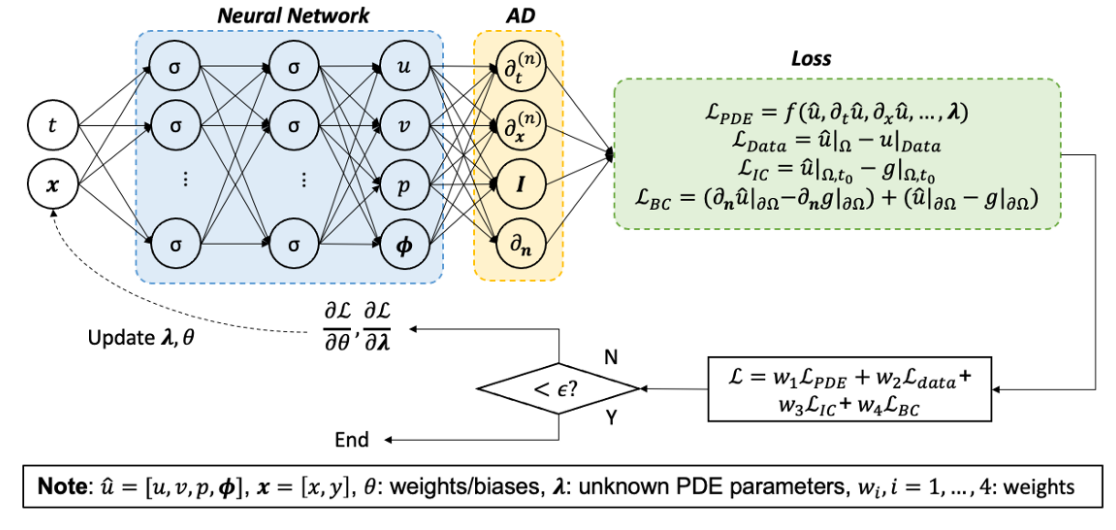

图1：**物理信息神经网络（PINN）的示意图**。一个全连接神经网络，以时间和空间坐标 $ (t, \mathbf{x}) $ 作为输入，[用于近似多物理场的解 $ \hat{u} = [u, v, p, \phi（可跳转）] $](#用于近似多物理场的解)。[通过自动微分（AD）计算 $ \hat{u} $ 对输入的导数（可跳转）](#通过自动微分)，然后用这些导数来构建在损失函数中偏微分方程的残差，该残差通常由多个加权不同系数的项组成。通过最小化损失函数，可以同时学习神经网络的参数 $ \theta $ 和未知的PDE参数 $ \lambda $。

---

### **对图中的PINNs网络的详细解释1**

图中展示了物理信息神经网络（PINNs）的工作原理和结构。以下是对每个部分的详细解释：

#### 1. 输入层
- **时间和空间坐标** $ (t, \mathbf{x}) $：输入层接受时间 $ t $ 和空间坐标 $ \mathbf{x} $ （如二维坐标 $ x $ 和 $ y $）作为输入。

#### 2. 神经网络（Neural Network）
- **全连接前馈神经网络**：图中蓝色部分表示一个典型的全连接前馈神经网络。神经网络由多个隐藏层组成，每一层的节点都与前一层的所有节点相连，进行非线性变换（如激活函数 $ \sigma $）。
- **输出层**：输出层产生多物理场的解 $ \hat{u} $，包括速度 $ u $、$ v $，压力 $ p $，以及其它物理量 $ \phi $。

#### 3. 自动微分（Automatic Differentiation，AD）
- **自动微分**：图中黄色部分表示自动微分模块。PINNs利用自动微分技术计算网络输出 $ \hat{u} $ 对输入 $ t $ 和 $ \mathbf{x} $ 的导数，如时间导数 $ \partial_t $ 和空间导数 $ \partial_x^{(n)} $，以及其它可能的导数。
- **残差计算**：这些导数用于构建偏微分方程（PDEs）的残差，在损失函数中进行评价。

#### 4. 损失函数（Loss）
- **PDE残差损失** $ \mathcal{L}_{\text{PDE}} $：这部分损失衡量神经网络输出是否满足偏微分方程。一般形式为 $ f(\hat{u}, \partial_t \hat{u}, \partial_x \hat{u}, ..., \lambda) $，其中 $ \lambda $ 是未知的PDE参数。
- **数据损失** $ \mathcal{L}_{\text{Data}} $：衡量神经网络输出与已知数据（如边界条件和初始条件）的差异。例如，$ \hat{u}|_{\Omega} - u_{\text{data}} $。
- **初始条件损失** $ \mathcal{L}_{\text{IC}} $：衡量神经网络输出在初始条件下的误差。例如，$ \hat{u}|_{\Omega, t_0} - g|_{\Omega, t_0} $。
- **边界条件损失** $ \mathcal{L}_{\text{BC}} $：衡量神经网络输出在边界条件下的误差。例如，$ (\partial_n \hat{u}|_{\partial \Omega} - \partial_n g|_{\partial \Omega}) + (\hat{u}|_{\partial \Omega} - g|_{\partial \Omega}) $。

综合损失函数为：
$$
\mathcal{L} = w_1 \mathcal{L}_{\text{PDE}} + w_2 \mathcal{L}_{\text{Data}} + w_3 \mathcal{L}_{\text{IC}} + w_4 \mathcal{L}_{\text{BC}}
$$
其中，$ w_i $ 是权重因子，用于平衡各部分损失的影响。

#### 5. 参数更新（Update $\lambda, \theta$）
- **梯度下降**：通过最小化综合损失函数，使用梯度下降或其变种（如Adam优化算法）来更新神经网络的权重和偏置 $ \theta $ 以及未知的PDE参数 $ \lambda $。
- **迭代过程**：重复计算损失函数和更新参数的过程，直到损失函数收敛到一个预设的阈值 $ \epsilon $ 以下。

#### 6. 终止条件
- **收敛判断**：当损失函数 $ \mathcal{L} $ 小于设定的阈值 $ \epsilon $ 时，训练终止，得到最终的模型参数。

### 总结

图中展示了PINNs的基本架构和工作流程，从输入层开始，通过神经网络进行前向传播，利用自动微分计算导数，再通过综合损失函数评估误差，[并通过梯度下降法更新网络参数（可跳转）](#通过梯度下降法更新网络参数)，最终得到满足PDE约束的物理信息神经网络模型。

---

### **对图中的PINNs网络的详细解释2**

该图展示了物理信息神经网络（PINNs）的架构和工作流程。以下是对图中各部分的详细解释：

#### 输入层
- **输入节点**：时间 $ t $ 和空间坐标 $ \mathbf{x} $（例如二维情况下为 $ [x, y] $）。
  - 时间 $ t $ 和空间坐标 $ \mathbf{x} $ 作为输入，表示需要预测的时空点。

#### 神经网络（Neural Network）
- **隐藏层**：由多个全连接层（fully-connected layers）组成，每层有若干神经元，使用激活函数 $ \sigma $（如ReLU、tanh等）进行非线性变换。
  - 这些层负责学习输入与输出之间的复杂关系。
- **输出层**：产生预测的多物理场解 $ \hat{u} = [u, v, p, \phi] $。
  - $ u $、$ v $、$ p $ 和 $ \phi $ 是流体力学中的物理量，例如速度分量、压力和其他物理场变量。

#### 自动微分（Automatic Differentiation, AD）
- **计算导数**：利用自动微分技术计算输出 $ \hat{u} $ 相对于输入 $ t $ 和 $ \mathbf{x} $ 的导数 $ \partial \hat{u} / \partial t $、$ \partial \hat{u} / \partial \mathbf{x} $、以及更高阶导数。
  - 自动微分（AD）确保这些导数的计算是高效且精确的。

#### 损失函数（Loss）
损失函数由多项组成，用于确保神经网络的输出不仅与数据匹配，而且满足物理约束。
- **PDE残差损失 $ \mathcal{L}_{\text{PDE}} $**：衡量神经网络输出是否满足偏微分方程（PDEs）。
  $$
  \mathcal{L}_{\text{PDE}} = f(\hat{u}, \partial_t \hat{u}, \partial_{\mathbf{x}} \hat{u}, \ldots, \lambda)
  $$
  其中 $ f $ 是PDE的表达式，$ \lambda $ 是未知的PDE参数。
- **数据损失 $ \mathcal{L}_{\text{Data}} $**：衡量网络预测值 $ \hat{u} $ 与实际数据 $ u_{\text{data}} $ 的差异。
  $$
  \mathcal{L}_{\text{Data}} = \left| \hat{u} - u_{\text{data}} \right|
  $$
- **初始条件损失 $ \mathcal{L}_{\text{IC}} $**：确保在初始时刻 $ t_0 $ 的预测值满足初始条件 $ g_{\Omega, t_0} $。
  $$
  \mathcal{L}_{\text{IC}} = \left| \hat{u}_{|\Omega, t_0} - g_{|\Omega, t_0} \right|
  $$
- **边界条件损失 $ \mathcal{L}_{\text{BC}} $**：确保在边界 $ \partial \Omega $ 上的预测值满足边界条件 $ g_{|\partial \Omega} $。
  $$
  \mathcal{L}_{\text{BC}} = \left( \partial_n \hat{u}_{|\partial \Omega} - \partial_n g_{|\partial \Omega} \right) + \left( \hat{u}_{|\partial \Omega} - g_{|\partial \Omega} \right)
  $$

#### 综合损失函数
最终的损失函数 $ \mathcal{L} $ 是上述各部分的加权和：
$$
\mathcal{L} = w_1 \mathcal{L}_{\text{PDE}} + w_2 \mathcal{L}_{\text{Data}} + w_3 \mathcal{L}_{\text{IC}} + w_4 \mathcal{L}_{\text{BC}}
$$
其中 $ w_1, w_2, w_3, w_4 $ 是权重因子，控制各项损失对总损失的贡献。

#### 训练过程
- **参数更新**：通过最小化综合损失函数 $ \mathcal{L} $，使用优化算法（如梯度下降或Adam）更新神经网络的参数 $ \theta $ 和未知的PDE参数 $ \lambda $。
  - 计算梯度 $ \partial \mathcal{L} / \partial \theta $ 和 $ \partial \mathcal{L} / \partial \lambda $，并进行参数更新。
- **迭代停止条件**：当损失函数 $ \mathcal{L} $ 低于某个阈值 $ \epsilon $ 时，停止迭代，训练结束。

### 总结
图中的PINNs网络架构展示了如何通过神经网络结合自动微分和物理约束，来有效地近似求解偏微分方程（PDEs）。这种方法不仅能够处理复杂的多物理场问题，而且在许多实际应用中具有高效和准确的优势。

### <a id="通过梯度下降法更新网络参数">**详细解释梯度下降和向后传播的关系**</a>

<details>
    <summary>点击展开/折叠详细信息</summary>

**向后传播（Backpropagation**和**梯度下降（Gradient Descent**是神经网络训练中的两个核心步骤。向后传播用于计算损失函数相对于网络参数（权重和偏置）的梯度，而梯度下降则使用这些梯度来更新网络参数，以最小化损失函数。

#### 向后传播（Backpropagation）
向后传播是一种高效的计算梯度的方法。通过链式法则，向后传播算法从输出层开始，逐层向后计算每个参数对损失函数的偏导数。

#### 梯度下降（Gradient Descent）
梯度下降是一种优化算法，通过使用计算得到的梯度来更新网络参数，以最小化损失函数。具体更新公式如下：
$$
\theta = \theta - \eta \frac{\partial \mathcal{L}}{\partial \theta}
$$
其中，$\theta$ 是网络参数，$\eta$ 是学习率，$\frac{\partial \mathcal{L}}{\partial \theta}$ 是损失函数相对于参数的梯度。

## **2 PINNs：物理信息神经网络（Physics-informed neural networks (PINNs) for fluid mechanics.pdf内容）**

<details>
    <summary>点击展开/折叠详细信息</summary>
在这一节中，我们首先回顾了基本的PINN概念，并随后讨论了在不可压缩流、可压缩流和生物医学流动中的最新进展。

**2.1 PINNs：基本概念**

我们考虑一个参数化的偏微分方程（PDE）系统，其形式为：
$$
f(x,t,\lambda,\partial x,\partial t, \ldots) = 0, \quad x \in \Omega, t \in [0, T]
$$
$$
\hat{x}(t_0) = g_0(x), \quad x \in \Omega
$$
$$
\hat{x}(t) = g_r(t), \quad x \in \partial\Omega, t \in [0, T]
$$
其中 $x \in \mathbb{R}^d$ 是空间坐标，$t$ 是时间；$f$ 表示PDE的残差，包含了微分算子（例如，$\partial x, \partial t, \ldots$; $\lambda = (\lambda_1, \lambda_2, \ldots)$ 是PDE参数；$\hat{x}(t, x)$ 是具有初始条件 $g_0(x)$ 和边界条件 $g_r(t)$ （可以是狄利克雷、诺伊曼或混合边界条件）的PDE解；$\Omega$ 和 $\partial\Omega$ 分别代表空间域和边界。

[<font color="red">在基本的PINNs环境下，一个由多个隐藏层组成的全连接前馈神经网络被用来近似PDE的解，通过采用空间和时间坐标作为输入，（可跳转）</font>](#一个由多个隐藏层组成的全连接前馈神经网络被用来近似PDE的解)如图1所示。让第$k$个隐藏层的隐藏变量表示为 $z^k$，则神经网络可以表达为：
$$
z^0 = (x,t),
$$
$$
z^k = g(w^k \cdot z^{k-1} + b^k), \quad 1 \leq k \leq L-1
$$
$$
z^L = w^L \cdot z^{L-1} + b^L
$$
其中最后一层的输出用来近似真实解，即 $\hat{x} \approx z^L$。$w^k$ 和 $b^k$ 分别表示第$k$层的权重矩阵和偏置向量；$g(\cdot)$ 是一个非线性激活函数。所有可训练的模型参数，即权重和偏置，都在本文中进行了讨论。

在PINNs中，通过迭代地更新 $\theta$ 来将方程1表示的PDE系统转化为一个优化问题，以最小化损失函数 $L$：
$$
L = \omega_1 L_{PDE} + \omega_2 L_{data} + \omega_3 L_{IC} + \omega_4 L_{BC},
$$
其中 $\omega_1$ 到 $\omega_4$ 是不同损失项的权重系数。方程3的第一项 $L_{PDE}$ 对方程的残差进行惩罚。其余项用于使模型预测满足测量数据 $L_{data}$，初始条件 $L_{IC}$，和边界条件 $L_{BC}$。通常，使用均方误差（MSE），通过采样点的L2范数来计算损失。采样点被定义为一个数据集 $\{x_i^j, t_i^j\}_{i=1}^N$，其中点的数量（记为N）对于不同的损失项可以不同。我们通常使用ADAM优化器，一种自适应的梯度基优化算法，来优化模型参数 $\theta$。

### <a id="通过自动微分">**详细解释通过自动微分（AD）计算 $ \hat{u} $ 对输入的导数**</a>

<details>
    <summary>点击展开/折叠详细信息</summary>
    
### 自动微分（AD）计算 $ \hat{u} $ 对输入的导数

自动微分（Automatic Differentiation, AD）是一种用于高效、准确地计算函数导数的技术。在物理信息神经网络（PINNs）中，AD 被广泛用于计算模型输出 $ \hat{u} $ 相对于输入（时间 $ t $ 和空间坐标 $ \mathbf{x} $）的导数。[这些导数对于构建物理损失函数（例如偏微分方程的残差）至关重要（可跳转）](#这些导数对于构建物理损失函数)。

#### 自动微分的基本原理

自动微分不同于数值微分和符号微分，它通过将计算过程分解为基本的算术操作和函数应用，然后应用链式法则来计算导数。AD 通常有两种模式：前向模式（Forward Mode）和反向模式（Reverse Mode）。<font color="red">在深度学习中，反向模式 AD 更常用，因为它能够高效地计算标量输出相对于向量输入的导数。</font>

#### 自动微分在PINNs中的应用

在 PINNs 中，自动微分用于计算神经网络输出 $ \hat{u} $ 对输入 $ t $ 和 $ \mathbf{x} $ 的导数。例如，我们需要计算：
- 时间导数 $ \frac{\partial \hat{u}}{\partial t} $
- 空间导数 $ \frac{\partial \hat{u}}{\partial x} $
- 更高阶导数，如 $ \frac{\partial^2 \hat{u}}{\partial x^2} $ 等

这些导数用于构建偏微分方程的残差，从而在损失函数中对神经网络输出进行评价。

#### 自动微分的计算过程

假设我们有一个简单的神经网络，其输入为 $ t $ 和 $ \mathbf{x} $，输出为 $ \hat{u} $。自动微分的计算过程如下：

1. **前向传播**：
   - 在前向传播过程中，我们将输入 $ t $ 和 $ \mathbf{x} $ 通过神经网络的各层，计算出输出 $ \hat{u} $。
   - 例如，神经网络的某一层的输出 $ h_i $ 可以表示为：
     $$
     h_i = \sigma \left( \sum_j w_{ij} h_j + b_i \right)
     $$
     其中，$ \sigma $ 是激活函数，$ w_{ij} $ 是权重，$ b_i $ 是偏置。

2. **计算导数**：
   - 使用自动微分技术，计算输出 $ \hat{u} $ 对输入 $ t $ 和 $ \mathbf{x} $ 的导数。自动微分框架（如 TensorFlow、PyTorch 等）在进行前向传播的同时，会记录计算图，并在反向传播时应用链式法则计算导数。
   - 例如，计算 $ \frac{\partial \hat{u}}{\partial t} $ 时，自动微分框架会自动跟踪 $ \hat{u} $ 中所有依赖 $ t $ 的计算步骤，并应用链式法则计算总导数。

#### 自动微分的优势

1. **高效性**：
   - 自动微分通过链式法则高效地计算导数，避免了数值微分中的截断误差和符号微分中的表达式爆炸问题。

2. **精确性**：
   - 自动微分计算的导数精度与计算机的浮点运算精度相同，不受数值微分中步长选择的影响。

3. **灵活性**：
   - 自动微分可以处理复杂的神经网络结构，包括循环神经网络（RNN）和卷积神经网络（CNN），并能计算高阶导数。

#### 实际应用

在 PINNs 的实际应用中，自动微分的计算过程如下：

1. **定义神经网络**：
   - 使用深度学习框架（如 TensorFlow 或 PyTorch）定义一个神经网络，其输入为 $ t $ 和 $ \mathbf{x} $，输出为 $ \hat{u} $。

2. **前向传播计算输出**：
   - 将输入 $ t $ 和 $ \mathbf{x} $ 通过神经网络，计算输出 $ \hat{u} $。

3. **计算导数**：
   - <font color="red">使用框架提供的自动微分功能，计算 $ \hat{u} $ 对 $ t $ 和 $ \mathbf{x} $ 的导数。例如，在 TensorFlow 中，可以使用 `tf.GradientTape` 计算导数。</font>

4. **构建损失函数**：
   - 使用计算得到的导数，构建物理损失函数（如偏微分方程的残差）。

5. **反向传播和参数更新**：
   - 计算损失函数相对于神经网络参数的梯度，并使用优化算法（如 Adam）更新神经网络的权重和偏置。

### 示例代码

以下是一个简单的示例，演示如何在 TensorFlow 中使用自动微分计算导数：

```python
import tensorflow as tf

# 定义神经网络模型
class PINN(tf.keras.Model):
    def __init__(self):
        super(PINN, self).__init__()
        self.hidden_layer1 = tf.keras.layers.Dense(20, activation='tanh')
        self.hidden_layer2 = tf.keras.layers.Dense(20, activation='tanh')
        self.output_layer = tf.keras.layers.Dense(1)

    def call(self, inputs):
        x = self.hidden_layer1(inputs)
        x = self.hidden_layer2(x)
        output = self.output_layer(x)
        return output

# 初始化神经网络
model = PINN()

# 定义输入变量
t = tf.Variable([0.0], dtype=tf.float32)
x = tf.Variable([1.0], dtype=tf.float32)
inputs = tf.stack([t, x], axis=1)

# 前向传播计算输出
with tf.GradientTape(persistent=True) as tape:
    tape.watch([t, x])
    u_hat = model(inputs)
    
    # 计算导数
    u_t = tape.gradient(u_hat, t)
    u_x = tape.gradient(u_hat, x)

# 输出导数
print("u_hat:", u_hat.numpy())
print("u_t:", u_t.numpy())
print("u_x:", u_x.numpy())
```

在这个示例中，我们定义了一个简单的 PINN 模型，并使用 `tf.GradientTape` 计算了 $ \hat{u} $ 对 $ t $ 和 $ x $ 的导数 $ \frac{\partial \hat{u}}{\partial t} $ 和 $ \frac{\partial \hat{u}}{\partial x} $。

### 总结

通过自动微分（AD），我们可以高效、准确地计算神经网络输出 $ \hat{u} $ 对输入（时间 $ t $ 和空间坐标 $ \mathbf{x} $）的导数。这些导数用于构建物理损失函数，从而确保神经网络的输出满足相关的物理定律。在 PINNs 中，自动微分是实现高精度、物理约束模拟的关键技术。

---

- **详细解释上面内容中的代码**

这段代码演示了如何使用TensorFlow定义一个物理信息神经网络（PINN），并通过自动微分计算神经网络输出对输入的导数。以下是对每个部分的详细解释：

### 1. 导入TensorFlow库

```python
import tensorflow as tf
```

首先，我们导入TensorFlow库，这是一个用于构建和训练神经网络的开源框架。

### 2. 定义PINN类

```python
class PINN(tf.keras.Model):
    def __init__(self):
        super(PINN, self).__init__()
        self.hidden_layer1 = tf.keras.layers.Dense(20, activation='tanh')
        self.hidden_layer2 = tf.keras.layers.Dense(20, activation='tanh')
        self.output_layer = tf.keras.layers.Dense(1)

    def call(self, inputs):
        x = self.hidden_layer1(inputs)
        x = self.hidden_layer2(x)
        output = self.output_layer(x)
        return output
```

这里定义了一个名为`PINN`的类，继承自`tf.keras.Model`。这个类包含了神经网络的结构：

- **构造函数`__init__`**：
  - 使用`super(PINN, self).__init__()`调用父类的构造函数。
  - 定义了三个层：两个隐藏层和一个输出层。
    - `self.hidden_layer1`：第一个隐藏层，有20个神经元，激活函数为`tanh`。
    - `self.hidden_layer2`：第二个隐藏层，有20个神经元，激活函数为`tanh`。
    - `self.output_layer`：输出层，有1个神经元，激活函数默认为线性激活。

- **`call`方法**：
  - 这个方法定义了前向传播过程。输入经过第一个隐藏层、第二个隐藏层，最后通过输出层得到最终的输出。
  - 返回值是网络的输出`output`。

### 3. 初始化神经网络

```python
model = PINN()
```

创建一个`PINN`类的实例，即初始化神经网络模型。

### 4. 定义输入变量

```python
t = tf.Variable([0.0], dtype=tf.float32)
x = tf.Variable([1.0], dtype=tf.float32)
inputs = tf.stack([t, x], axis=1)
```

定义了两个输入变量`t`和`x`，并使用`tf.stack`将它们合并成一个输入张量`inputs`。这里：
- `t`：一个时间变量，初始值为0.0。
- `x`：一个空间变量，初始值为1.0。
- `inputs`：将`t`和`x`合并成一个形状为(1, 2)的张量，表示有一个样本，每个样本有两个特征（时间和空间）。

### 5. 前向传播和计算导数

```python
with tf.GradientTape(persistent=True) as tape:
    tape.watch([t, x])
    u_hat = model(inputs)
    
    # 计算导数
    u_t = tape.gradient(u_hat, t)
    u_x = tape.gradient(u_hat, x)
```

使用`tf.GradientTape`记录计算过程，以便在后续计算导数：
- `persistent=True`：使得`GradientTape`对象可以多次使用来计算多个导数。
- `tape.watch([t, x])`：明确告诉`GradientTape`要跟踪`t`和`x`。
- `u_hat = model(inputs)`：前向传播，计算网络的输出`u_hat`。

计算导数：
- `u_t = tape.gradient(u_hat, t)`：计算输出`u_hat`相对于`t`的导数。
- `u_x = tape.gradient(u_hat, x)`：计算输出`u_hat`相对于`x`的导数。

### 6. 输出结果

```python
print("u_hat:", u_hat.numpy())
print("u_t:", u_t.numpy())
print("u_x:", u_x.numpy())
```

打印计算结果：
- `u_hat`：神经网络的输出。
- `u_t`：输出`u_hat`相对于`t`的导数。
- `u_x`：输出`u_hat`相对于`x`的导数。

### 总结

这段代码演示了如何使用TensorFlow定义一个简单的PINN模型，并通过自动微分技术计算模型输出对输入变量（时间和空间坐标）的导数。这种方法在物理信息神经网络中非常有用，因为它能够高效地计算神经网络输出的导数，从而用于构建物理损失函数，确保网络输出符合物理定律。

---

- **详细解释下面代码：**

```python
with tf.GradientTape(persistent=True) as tape:
    tape.watch([t, x])
    u_hat = model(inputs)
    
    # 计算导数
    u_t = tape.gradient(u_hat, t)
    u_x = tape.gradient(u_hat, x)
```

### 详细解释代码

这段代码使用了 TensorFlow 中的 `tf.GradientTape` 来计算神经网络输出对输入变量的导数。以下是对每一部分的详细解释：

#### 代码块
```python
with tf.GradientTape(persistent=True) as tape:
    tape.watch([t, x])
    u_hat = model(inputs)
    
    # 计算导数
    u_t = tape.gradient(u_hat, t)
    u_x = tape.gradient(u_hat, x)
```

### 1. 使用 `tf.GradientTape`
```python
with tf.GradientTape(persistent=True) as tape:
```
- `tf.GradientTape` 是 TensorFlow 提供的一个用于记录计算过程以便后续计算梯度的上下文管理器。
- `persistent=True` 参数使得 `GradientTape` 对象在使用 `gradient` 方法多次计算梯度时不会被释放，允许多次计算梯度。默认情况下，`GradientTape` 在调用一次 `gradient` 后就会被释放。

### 2. 监控变量
```python
tape.watch([t, x])
```
- `tape.watch` 方法明确指定要监控的变量（这里是 `t` 和 `x`），这些变量将参与后续的梯度计算。
- 在默认情况下，`tf.GradientTape` 只会自动监控 `tf.Variable` 类型的变量。为了确保计算过程中涉及的张量 `t` 和 `x` 被监控，必须显式地调用 `tape.watch`。

### 3. [前向传播（可跳转）](#向前传播)
```python
u_hat = model(inputs)
```
- `model(inputs)` 是前向传播步骤，将输入 `inputs` 传递给模型，计算输出 `u_hat`。
- 这里的 `inputs` 是由时间变量 `t` 和空间变量 `x` 组成的输入张量。

### 4. 计算导数
```python
u_t = tape.gradient(u_hat, t)
u_x = tape.gradient(u_hat, x)
```
- `tape.gradient(target, sources)` 方法用于计算 `target`（目标）相对于 `sources`（源）的梯度。
- `u_t = tape.gradient(u_hat, t)` 计算神经网络输出 `u_hat` 对时间变量 `t` 的梯度，结果存储在 `u_t` 中。
- `u_x = tape.gradient(u_hat, x)` 计算神经网络输出 `u_hat` 对空间变量 `x` 的梯度，结果存储在 `u_x` 中。

### 解释每一步的作用

1. **开启梯度记录上下文**：
   - `with tf.GradientTape(persistent=True) as tape:`：开始一个 `tf.GradientTape` 上下文，在该上下文内的所有操作都会被记录下来，用于后续的梯度计算。

2. **监控变量**：
   - `tape.watch([t, x])`：明确告诉 `GradientTape` 需要监控 `t` 和 `x` 变量的变化，这些变量会被用来计算导数。

3. **前向传播计算输出**：
   - `u_hat = model(inputs)`：将输入 `inputs` 传入神经网络模型 `model`，得到输出 `u_hat`。这一步是在 `GradientTape` 上下文中进行的，因此计算图被记录下来。

4. **计算导数**：
   - `u_t = tape.gradient(u_hat, t)`：计算 `u_hat` 对 `t` 的梯度，即 `\partial \hat{u} / \partial t`。
   - `u_x = tape.gradient(u_hat, x)`：计算 `u_hat` 对 `x` 的梯度，即 `\partial \hat{u} / \partial x`。

### 应用场景

这种使用 `tf.GradientTape` 计算梯度的方法在 PINNs 中非常重要，因为 PINNs 需要通过这些导数来构建物理损失函数。例如，在流体力学问题中，我们可能需要计算速度场的时间导数和空间导数，以确保神经网络输出满足相关的偏微分方程（如 Navier-Stokes 方程）。

### 总结

这段代码展示了如何使用 TensorFlow 的 `tf.GradientTape` 记录计算过程，并计算神经网络输出对输入变量的导数。这种方法在处理涉及导数计算的复杂物理问题时非常有用，特别是在 PINNs 中，它确保了神经网络输出能够满足物理约束和方程。

#### <a id="这些导数对于构建物理损失函数">**详细解释为何`这些导数对于构建物理损失函数（例如偏微分方程的残差）至关重要`?**</a>

<details>
    <summary>点击展开/折叠详细信息</summary>
    
在物理信息神经网络（PINNs）中，自动微分（Automatic Differentiation, AD）被广泛用于计算模型输出 $\hat{u}$ 相对于输入（时间 $t$ 和空间坐标 $\mathbf{x}$）的导数。这些导数对于构建物理损失函数（例如偏微分方程的残差）至关重要，主要有以下几个原因：

### 1. 直接计算偏微分方程的残差

<font color="red">偏微分方程（PDE）通常涉及解的时间导数和空间导数。例如，Navier-Stokes方程的残差项包括速度场的时间导数、空间导数及其高阶导数。如果没有准确计算这些导数，我们无法评估数值解是否满足PDE的要求。自动微分能够高效、精确地计算这些导数，从而直接用于PDE残差的计算。</font>

### 2. 确保物理一致性

PINNs的一个重要目标是确保数值解不仅拟合数据，还满足物理规律。物理规律通常以PDE的形式表达，这些方程对解的导数有严格的要求。例如，在流体力学中，连续性方程要求速度场的散度为零（不可压缩性），而动量方程则涉及速度场的时间导数和空间导数。通过计算这些导数并将它们纳入损失函数，我们能够确保模型输出符合物理规律，提高模型的物理一致性。

### 3. 构建损失函数的关键成分

在PINNs中，损失函数由数据损失和PDE损失两部分组成。数据损失衡量模型预测与观测数据的差异，而PDE损失衡量模型预测是否满足物理方程。PDE损失的计算依赖于解的导数。例如：

- 对Navier-Stokes方程：
  $$
  f_{1,2,3} = \frac{\partial \mathbf{u}}{\partial t} + (\mathbf{u} \cdot \nabla)\mathbf{u} + \nabla p - \frac{1}{Re} \nabla^2 \mathbf{u}
  $$
- 对连续性方程：
  $$
  f_4 = \nabla \cdot \mathbf{u}
  $$

这些残差项都依赖于对速度场$\mathbf{u}$和压力场$p$的时间导数和空间导数的精确计算。只有通过准确计算这些导数，才能构建有效的PDE损失函数。

### 4. 提高数值求解的精度和效率

自动微分提供了一种高效且精确的导数计算方法，与传统的数值微分相比，AD避免了截断误差和数值不稳定性。准确的导数计算不仅提高了损失函数的精度，还加快了模型训练的收敛速度。对于复杂的物理问题，如湍流模拟和多物理场耦合，精确的导数计算尤为重要。

### 示例代码

以下是一个示例，展示如何在PINNs中使用自动微分计算导数，并构建PDE残差项和损失函数：

```python
import tensorflow as tf
import numpy as np

# 定义简单的神经网络模型
class PINN(tf.keras.Model):
    def __init__(self):
        super(PINN, self).__init__()
        self.hidden_layer1 = tf.keras.layers.Dense(20, activation='tanh')
        self.hidden_layer2 = tf.keras.layers.Dense(20, activation='tanh')
        self.output_layer = tf.keras.layers.Dense(4)  # 输出四个值 (u, v, w, p)

    def call(self, inputs):
        x = self.hidden_layer1(inputs)
        x = self.hidden_layer2(x)
        output = self.output_layer(x)
        return output

# 初始化神经网络
model = PINN()

# 定义物理方程和损失函数
Re = 100  # 雷诺数
def pde_loss(model, x, y, z, t):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch([x, y, z, t])
        inputs = tf.concat([x, y, z, t], axis=1)
        u_v_w_p = model(inputs)
        u = u_v_w_p[:, 0:1]
        v = u_v_w_p[:, 1:2]
        w = u_v_w_p[:, 2:3]
        p = u_v_w_p[:, 3:4]

        # 计算各项导数
        u_t = tape.gradient(u, t)
        v_t = tape.gradient(v, t)
        w_t = tape.gradient(w, t)

        u_x = tape.gradient(u, x)
        u_y = tape.gradient(u, y)
        u_z = tape.gradient(u, z)

        v_x = tape.gradient(v, x)
        v_y = tape.gradient(v, y)
        v_z = tape.gradient(v, z)

        w_x = tape.gradient(w, x)
        w_y = tape.gradient(w, y)
        w_z = tape.gradient(w, z)

        p_x = tape.gradient(p, x)
        p_y = tape.gradient(p, y)
        p_z = tape.gradient(p, z)

        u_xx = tape.gradient(u_x, x)
        u_yy = tape.gradient(u_y, y)
        u_zz = tape.gradient(u_z, z)

        v_xx = tape.gradient(v_x, x)
        v_yy = tape.gradient(v_y, y)
        v_zz = tape.gradient(v_z, z)

        w_xx = tape.gradient(w_x, x)
        w_yy = tape.gradient(w_y, y)
        w_zz = tape.gradient(w_z, z)

        # 计算残差项
        f1 = u_t + (u * u_x + v * u_y + w * u_z) + p_x - (1 / Re) * (u_xx + u_yy + u_zz)
        f2 = v_t + (u * v_x + v * v_y + w * v_z) + p_y - (1 / Re) * (v_xx + v_yy + v_zz)
        f3 = w_t + (u * w_x + v * w_y + w * w_z) + p_z - (1 / Re) * (w_xx + w_yy + w_zz)
        f4 = u_x + v_y + w_z

    # 计算PDE损失
    loss_pde = tf.reduce_mean(tf.square(f1)) + tf.reduce_mean(tf.square(f2)) + tf.reduce_mean(tf.square(f3)) + tf.reduce_mean(tf.square(f4))
    return loss_pde

# 生成训练数据
N_f = 1000
x_train = np.random.rand(N_f, 1).astype(np.float32)
y_train = np.random.rand(N_f, 1).astype(np.float32)
z_train = np.random.rand(N_f, 1).astype(np.float32)
t_train = np.random.rand(N_f, 1).astype(np.float32)

# 训练神经网络
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
for epoch in range(1000):
    with tf.GradientTape() as tape:
        loss = pde_loss(model, x_train, y_train, z_train, t_train)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.numpy()}')
```

### 总结

自动微分在物理信息神经网络（PINNs）中用于计算模型输出$\hat{u}$相对于输入（时间$t$和空间坐标$\mathbf{x}$）的导数。通过精确计算这些导数，可以构建物理损失函数（例如PDE残差），确保模型不仅拟合数据，还符合物理规律。自动微分提高了计算的精度和效率，是构建和训练PINNs模型的关键技术。

#### <a id="向前传播">**详细解释向前传播和反向传播**</a>

<details>
    <summary>点击展开/折叠详细信息</summary>
  
向前传播（Forward Propagation）和反向传播（Backward Propagation）是神经网络训练过程中两个不同且关键的步骤，它们有不同的功能和过程。以下是对它们的详细解释：

### 向前传播（Forward Propagation）

#### 定义
向前传播是指将输入数据通过神经网络，从输入层逐层传递到输出层，计算每个神经元的激活值，最终得到网络的输出结果。

#### 过程
1. **输入数据**：
   - 输入数据 $ x $ 被传递到输入层。
   
2. **计算隐藏层激活值**：
   - 每一层的输出都是下一层的输入。例如，对于第 $ l $ 层的神经元，激活值 $ a^{(l)} $ 可以通过激活函数 $ \sigma $ 计算：
     $$
     z^{(l)} = W^{(l)}a^{(l-1)} + b^{(l)}
     $$
     $$
     a^{(l)} = \sigma(z^{(l)})
     $$
     其中，$ W^{(l)} $ 是权重矩阵，$ b^{(l)} $ 是偏置向量，$ z^{(l)} $ 是线性组合，$ a^{(l)} $ 是激活值。

3. **输出层**：
   - 最后一层的输出 $ a^{(L)} $ 作为网络的预测结果 $ \hat{y} $。

#### 目的
向前传播的目的是计算神经网络的输出，以便与实际标签进行比较，计算损失函数。

### 反向传播（Backward Propagation）

#### 定义
[反向传播是指通过计算损失函数相对于每个权重和偏置的梯度，逐层更新神经网络的参数，以最小化损失函数](#反向传播是指通过计算损失函数相对于每个权重和偏置的梯度，逐层更新神经网络的参数，以最小化损失函数)。反向传播使用链式法则计算梯度。

#### 过程
1. **计算损失函数**：
   - 使用向前传播的输出 $ \hat{y} $ 和实际标签 $ y $ 计算损失函数 $ \mathcal{L}(\hat{y}, y) $。

2. **计算输出层梯度**：
   - 计算损失函数相对于输出层激活值的梯度：
     $$
     \delta^{(L)} = \frac{\partial \mathcal{L}}{\partial a^{(L)}}
     $$

3. **逐层计算梯度**：
   - 通过链式法则，逐层计算损失函数相对于每层参数（权重和偏置）的梯度。对于第 $ l $ 层：
     $$
     \delta^{(l)} = (W^{(l+1)})^T \delta^{(l+1)} \odot \sigma'(z^{(l)})
     $$
     其中，$ \odot $ 表示逐元素相乘（Hadamard积），$ \sigma'(z^{(l)}) $ 是激活函数的导数。

4. **更新参数**：
   - 使用计算出的梯度更新每层的权重和偏置。常见的优化算法有梯度下降（Gradient Descent）、Adam 等。对于权重 $ W $ 和偏置 $ b $：
     $$
     W^{(l)} := W^{(l)} - \eta \frac{\partial \mathcal{L}}{\partial W^{(l)}}
     $$
     $$
     b^{(l)} := b^{(l)} - \eta \frac{\partial \mathcal{L}}{\partial b^{(l)}}
     $$
     其中，$ \eta $ 是学习率。

#### 目的
反向传播的目的是通过最小化损失函数来调整神经网络的参数，使网络的预测更准确。

### 总结

- **向前传播**：将输入数据通过网络传递到输出层，计算网络的预测结果。
- **反向传播**：使用损失函数的梯度，通过链式法则逐层计算并更新网络参数，以最小化损失。

### 示例代码
以下是一个简单的示例，展示了向前传播和反向传播的过程：

```python
import tensorflow as tf

# 定义简单的神经网络模型
class SimpleNN(tf.keras.Model):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(10, activation='tanh')
        self.output_layer = tf.keras.layers.Dense(1)

    def call(self, inputs):
        x = self.hidden_layer(inputs)
        return self.output_layer(x)

# 初始化神经网络
model = SimpleNN()

# 定义损失函数和优化器
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam()

# 输入和标签
x = tf.constant([[1.0, 2.0]])
y_true = tf.constant([[5.0]])

# 计算前向传播
with tf.GradientTape() as tape:
    y_pred = model(x)  # 前向传播
    loss = loss_fn(y_true, y_pred)  # 计算损失

# 计算反向传播
gradients = tape.gradient(loss, model.trainable_variables)  # 计算梯度
optimizer.apply_gradients(zip(gradients, model.trainable_variables))  # 更新参数

print("Predicted:", y_pred.numpy())
print("Loss:", loss.numpy())
```

这个示例展示了如何在TensorFlow中进行前向传播和反向传播。前向传播计算输出和损失，反向传播计算梯度并更新模型参数。

#### <a id="反向传播是指通过计算损失函数相对于每个权重和偏置的梯度，逐层更新神经网络的参数，以最小化损失函数">**用例子详细解释`反向传播是指通过计算损失函数相对于每个权重和偏置的梯度，逐层更新神经网络的参数，以最小化损失函数`**</a>

<details>
    <summary>点击展开/折叠详细信息</summary>
  
### 详细解释反向传播

反向传播是神经网络训练过程中用于计算损失函数相对于每个权重和偏置的梯度，并逐层更新神经网络参数的方法。其目标是[最小化损失函数，使得神经网络的预测结果更加准确](#)。以下通过一个具体的示例代码进行详细解释。

#### 示例代码

```python
import tensorflow as tf

# 定义简单的神经网络模型
class SimpleNN(tf.keras.Model):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(10, activation='relu')
        self.output_layer = tf.keras.layers.Dense(1)

    def call(self, inputs):
        x = self.hidden_layer(inputs)
        return self.output_layer(x)

# 初始化神经网络
model = SimpleNN()

# 定义损失函数和优化器
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# 输入和标签
x = tf.constant([[1.0, 2.0]])
y_true = tf.constant([[5.0]])

# 计算前向传播
with tf.GradientTape() as tape:
    y_pred = model(x)  # 前向传播
    loss = loss_fn(y_true, y_pred)  # 计算损失

# 计算反向传播
gradients = tape.gradient(loss, model.trainable_variables)  # 计算梯度
optimizer.apply_gradients(zip(gradients, model.trainable_variables))  # 更新参数

print("Predicted:", y_pred.numpy())
print("Loss:", loss.numpy())
```

### 代码解释

#### 1. 导入TensorFlow库

```python
import tensorflow as tf
```
首先，导入TensorFlow库，这是一个用于构建和训练神经网络的开源框架。

#### 2. 定义神经网络模型

```python
class SimpleNN(tf.keras.Model):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(10, activation='relu')
        self.output_layer = tf.keras.layers.Dense(1)

    def call(self, inputs):
        x = self.hidden_layer(inputs)
        return self.output_layer(x)
```

- `SimpleNN` 类定义了一个简单的神经网络模型，继承自 `tf.keras.Model`。
- 构造函数 `__init__` 定义了神经网络的层次结构：
  - 一个隐藏层 `hidden_layer`，包含10个神经元，激活函数为ReLU。
  - 一个输出层 `output_layer`，包含1个神经元，线性激活函数。
- `call` 方法定义了前向传播的计算步骤，将输入数据通过隐藏层和输出层，返回最终的预测结果。

#### 3. 初始化神经网络模型

```python
model = SimpleNN()
```
创建一个 `SimpleNN` 类的实例 `model`。

#### 4. 定义损失函数和优化器

```python
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
```

- `loss_fn` 定义了均方误差（MSE）损失函数，用于计算预测值和真实值之间的误差。
- `optimizer` 定义了Adam优化器，学习率为0.01，用于更新神经网络的参数。

#### 5. 定义输入数据和标签

```python
x = tf.constant([[1.0, 2.0]])
y_true = tf.constant([[5.0]])
```

- `x` 是输入数据，这里是一个二维向量 `[1.0, 2.0]`。
- `y_true` 是真实标签，这里是一个标量 `5.0`。

#### 6. 前向传播和计算损失

```python
with tf.GradientTape() as tape:
    y_pred = model(x)  # 前向传播
    loss = loss_fn(y_true, y_pred)  # 计算损失
```

- 使用 `tf.GradientTape` 记录计算过程，以便后续计算梯度。
- `model(x)` 执行前向传播，计算网络的预测值 `y_pred`。
- `loss_fn(y_true, y_pred)` 计算预测值 `y_pred` 和真实值 `y_true` 之间的损失。

#### 7. 计算梯度

```python
gradients = tape.gradient(loss, model.trainable_variables)  # 计算梯度
```

- 使用 `tape.gradient` 计算损失 `loss` 相对于模型参数（权重和偏置）的梯度。
- `model.trainable_variables` 包含模型的所有可训练参数。

#### 8. 更新参数

```python
optimizer.apply_gradients(zip(gradients, model.trainable_variables))  # 更新参数
```

- 使用 `optimizer.apply_gradients` 方法更新模型的参数。`zip(gradients, model.trainable_variables)` 将梯度和对应的模型参数打包在一起。

#### 9. 输出预测值和损失

```python
print("Predicted:", y_pred.numpy())
print("Loss:", loss.numpy())
```

- 打印模型的预测值 `y_pred` 和损失 `loss`。

### 总结

通过这个示例，我们详细解释了反向传播的过程：

1. **前向传播**：计算模型的预测值。
2. **计算损失**：比较预测值和真实值，计算损失。
3. **计算梯度**：使用 `tf.GradientTape` 记录前向传播过程，并计算损失相对于模型参数的梯度。
4. **更新参数**：使用优化器根据计算的梯度更新模型参数。

反向传播的核心是利用链式法则逐层计算损失函数相对于每个参数的梯度，然后使用这些梯度来更新参数，使得损失函数逐渐减小，最终使模型的预测更加准确。

#### <a id="用于近似多物理场的解">**详细解释用于近似多物理场的解 $ \hat{u} = [u, v, p, \phi] $**</a>

<details>
    <summary>点击展开/折叠详细信息</summary>
  
用于近似多物理场的解 $ \hat{u} = [u, v, p, \phi] $ 是指通过神经网络来预测和逼近一组物理量的值。这些物理量通常涉及流体力学或其他涉及多物理场问题的学科。以下是对这些物理量的详细解释：

### 物理量解释

1. **$ u $：流向速度**
   - $ u $ 表示在某个特定时空点的流体在$x$方向上的速度分量。对于二维或三维流体力学问题，这通常是主要的研究对象之一。流向速度是理解流体流动模式和动量分布的关键。

2. **$ v $：横向速度**
   - $ v $ 表示在某个特定时空点的流体在$y$方向上的速度分量。它通常与$u$一起使用，以描述流体的二维流动情况。在三维问题中，这个量可能会扩展到描述$y$和$z$方向上的流动。

3. **$ p $：压力**
   - $ p $ 是在某个特定时空点的流体压力。压力场对于理解流体的动力学行为至关重要，因为它直接影响流体的运动和力的传递。在很多流体力学问题中，压力和速度场是密切相关的。

4. **$ \phi $：其他物理量**
   - $ \phi $ 可以代表任何其他相关的物理量，具体取决于研究的具体问题。例如，在传热问题中，$ \phi $ 可能表示温度场；在电磁学问题中，$ \phi $ 可能表示电势或磁场强度。在生物医学流动中，$ \phi $ 可能表示某种物质的浓度或其他生理参数。

### 多物理场解的近似

在PINNs（物理信息神经网络）中，我们通过构建和训练神经网络来近似这些物理量的分布。以下是这一过程的详细步骤：

1. **输入层**：
   - 输入层接受时间 $ t $ 和空间坐标 $ \mathbf{x} $ （如二维坐标 $ x $ 和 $ y $ 或三维坐标 $ x, y, z $）作为输入。这些输入表示我们想要预测的时空点。

2. **神经网络结构**：
   - 神经网络由多个隐藏层组成，每层有若干神经元。隐藏层之间通过权重和偏置相连接，每个神经元通过激活函数（如ReLU或tanh）进行非线性变换。
   - 通过多层的变换，神经网络逐渐学习并逼近输入与输出之间的复杂关系。

3. **输出层**：
   - 输出层的节点产生预测的多物理场解 $ \hat{u} $。在这个例子中，输出层包含四个节点，分别对应于 $ u $、$ v $、$ p $ 和 $ \phi $。
   - 神经网络输出的这些值就是我们所要近似的物理量。

4. **损失函数**：
   - PINNs的一个关键特点是它们的损失函数不仅包括数据损失（即预测值与已知数据的差异），还包括物理损失（即预测值是否满足相关的物理方程，如偏微分方程）。
   - 通过在训练过程中最小化这些损失，神经网络能够同时满足数据和物理约束，从而获得更精确的物理场解。

5. **自动微分**：
   - 在训练过程中，自动微分技术用于计算输出 $ \hat{u} $ 对输入 $ t $ 和 $ \mathbf{x} $ 的导数。这些导数用于构建物理损失函数，以确保神经网络的输出满足物理定律。

### 应用示例

例如，在模拟血液流动的问题中，我们希望预测动脉内的速度场和压力场：
- $ u $ 和 $ v $ 分别表示血液在动脉内的两个方向上的速度。
- $ p $ 表示血液的压力分布。
- $ \phi $ 可能表示血液中的某种物质的浓度，例如氧气或药物。

通过训练PINNs，我们可以得到血液在动脉内的速度和压力分布，这对于医学诊断和治疗具有重要意义。

### 总结

用于近似多物理场的解 $ \hat{u} = [u, v, p, \phi] $ 表示通过PINNs模型预测一组相关的物理量。这些物理量的准确预测有助于解决复杂的流体力学和多物理场问题。通过结合数据和物理约束，PINNs能够提供高精度的预测结果，在实际应用中具有广泛的应用前景。

#  **数值模拟的输入数据是什么**

<details>
  <summary>点击展开/折叠详细信息</summary>
    
数值模拟的输入数据种类广泛，具体取决于所解决的问题和所使用的数值方法。这些数据通常包括初始条件、边界条件、物理和化学性质参数，以及可能的源项或外力。以下详细介绍这些输入数据的类型和作用：

### 1. **初始条件**
对于时间相关的问题，如动态系统的模拟，需要初始条件来设定模拟开始时系统的状态。这可能包括速度、温度、浓度、位移等在整个计算域内的分布。

**示例**：
- 在流体动力学模拟中，初始条件可能是流体在起始时刻的速度场和压力分布。
- 在热传导问题中，初始条件可能是物体的初始温度分布。

### 2. **边界条件**
边界条件是在计算域的边界上施加的条件，用以描述边界上物理量的行为。这些条件根据问题的性质可能是固定值（狄利克雷条件）、流量（诺依曼条件）、或是更复杂的动态边界条件。

**示例**：
- 在结构分析中，边界条件可能包括在某些边界上施加的固定位移或力。
- 在流体动力学中，边界条件可能包括入口处的流速和出口处的压力。

### 3. **物理和化学参数**
这些参数定义了系统的物理和化学特性，包括但不限于密度、粘度、热导率、弹性模量、化学反应速率等。这些参数对于正确模拟物理过程至关重要。

**示例**：
- 在化学反应工程模拟中，需要知道反应物的反应速率常数和活化能。
- 在流体动力学中，流体的粘度和密度是必需的输入参数。

### 4. **几何数据**
几何数据描述了计算域的空间结构，这是进行任何类型数值模拟的基础。在有限元分析中，几何数据尤为重要，因为整个计算网格的生成都依赖于精确的几何描述。

**示例**：
- 在建筑物的风洞测试模拟中，需要详细的建筑物外形和周边地形的几何数据。
- 在汽车碰撞模拟中，需要汽车的精确三维模型。

### 5. **源项和外力**
在许多物理问题中，系统可能受到外部力量的影响，例如外加热源、外力、电磁场等。这些源项和外力必须作为输入数据提供给数值模拟。

**示例**：
- 在地震工程模拟中，地震波形作为外力输入，用来模拟其对建筑结构的影响。
- 在电磁场模拟中，可能需要外加的电场或磁场作为源项。

### 总结
数值模拟的输入数据提供了必要的信息，以确保模拟可以准确反映现实世界的物理现象。这些数据不仅定义了问题的物理界限，还确保了数值解的准确性和可靠性。精确和全面的输入数据是成功进行科学和工程数值模拟的基础。

# **我目前的数据集中是包含每个点位的特征 `X`、`Y`、`H`、`uc`、`vc`特征，以及点位之间的四边形形式的拓扑关系，根据我的数据集是否可以使用PINNs**

<details>
  <summary>点击展开/折叠详细信息</summary>

是的，您的数据集——包括每个点位的空间位置 (`X`, `Y`)、水深 (`H`) 和流速组分 (`uc`, `vc`)，以及点位之间的四边形形式的拓扑关系——非常适合应用物理信息神经网络（PINNs）。这种类型的数据为使用 PINNs 提供了丰富的环境和水力学特性，使得您能够有效地将物理规律（如流体动力学方程）集成到神经网络的学习过程中。

### 如何使用您的数据集搭建 PINNs：

1. **物理模型定义**：
   - 根据水力学和流体动力学的原理，您可以将纳维-斯托克斯方程（Navier-Stokes equations）或其他相关的水动力方程作为物理约束引入模型。这些方程描述了流体流动的物理规律，适用于预测流速 (`uc`, `vc`) 和水深 (`H`) 的变化。

2. **网络设计**：
   - 设计一个神经网络，其中输入层接受点位的位置 (`X`, `Y`) 和可能的初始或边界条件，输出层预测对应的流速和水深。
   - 在网络的损失函数中，除了传统的预测误差项，还需要加入一个物理约束项，即纳维-斯托克斯方程在每个点位上的残差。

3. **数据处理和拓扑结构**：
   - 利用您的四边形拓扑关系数据构建图结构，这有助于在 PINNs 框架中模拟水流从一个点位到相邻点位的动态传递过程。
   - 拓扑结构信息可以辅助确定网络在空间上如何传播和更新信息，尤其是在处理流体动力学时。

4. **训练和优化**：
   - 利用收集到的点位特征和拓扑关系训练您的 PINNs。训练过程需要同时最小化预测误差和物理约束的违反程度。
   - 根据模型在训练集和验证集上的表现调整网络结构和参数。

5. **应用和验证**：
   - 使用训练好的模型预测新的或未见过的点位的流速和水深。
   - 通过实验或现场数据验证模型预测的准确性和可靠性。

### 注意事项：

- **模型复杂性**：<font color="red">由于需要同时处理大量的空间数据和复杂的物理方程，PINNs 的实现和训练可能需要较高的计算资源和技术专业知识。</font>
- **数据质量和充足性**：确保数据的质量和覆盖范围足够支持模型学习复杂的物理过程。
- **模型泛化能力**：尤其是在复杂的自然环境中，验证模型的泛化能力和预测未见情况的能力非常关键。

总的来说，您的数据集为利用 PINNs 解决具体的水文动力问题提供了坚实的基础，通过适当的模型设计和训练，可以实现精确的预测和深入的物理洞察。

# **数值模拟得到的河道中的点位数据是否可以使用PINNs进行预测?**

<details>
    <summary>点击展开/折叠详细信息</summary>
    
是的，<font color="red">数值模拟得到的河道中的点位数据确实可以使用物理信息神经网络（PINNs）进行预测</font>。PINNs 是一种结合了深度学习和物理科学的方法，特别适用于处理具有复杂物理过程的问题，如流体动力学和水动力学。使用PINNs对河道流动等现象进行预测和分析有几个关键优势：

### 1. **整合物理定律**
PINNs 允许直接在神经网络的训练过程中整合已知的物理定律，如纳维-斯托克斯方程和连续性方程。这意味着网络不仅从数据中学习模式，还能遵守基本的物理规律，从而提高预测的准确性和可靠性。

### 2. **处理不确定性和数据稀疏性**
<font color="red">在自然河流中进行实地测量可能会面临数据稀疏和测量误差问题。PINNs 的一个优点是它可以在数据较少的情况下进行有效的学习，因为它通过物理规律来补充数据不足的部分，提高模型对未知区域的推断能力。</font>

### 3. **灵活性和适应性**
PINNs 提供了处理不同类型河流和流动条件的灵活性，无论是稳态流还是非稳态流，都可以通过适当的网络架构和损失函数来建模。

### 4. **多物理过程整合**
河道流动常涉及多种物理过程（如沉积物输运、化学污染物扩散等），PINNs 允许在同一框架下整合多个相关的物理过程，这对于综合模拟和管理复杂的环境系统非常有用。

### <font color="red">实施步骤</font>

<font color="red">要使用PINNs对河道中的点位数据进行预测，可以遵循以下基本步骤：</font>

1. **数据准备**：整理和预处理河道点位的数据，包括流速、水深、底部地形等信息。
2. **网络设计**：设计一个包含输入层（接收空间坐标和可能的时间信息）、多个隐藏层和输出层（预测流速、水深等）的神经网络。
3. **损失函数构建**：定义损失函数，包括数据误差项和物理约束项（确保满足纳维-斯托克斯方程等）。
4. **模型训练**：<font color="red">使用数值模拟数据训练网络</font>，应用如梯度下降等优化算法调整网络权重。
5. **验证和测试**：使用独立的测试数据集测试模型的性能，验证其预测准确性和泛化能力。
6. **应用**：将训练好的模型应用于河道流动的预测和分析，如洪水模拟、污染物扩散预测等。

总之，PINNs为河道流动和其他复杂水动力学问题提供了一个强大的分析和预测工具，特别是在现有数据集与物理模型相结合的情况下，能够显著提高预测的准确性和效率。

# **PINNs选用适当的网络架构和损失函数来建模**

<details>
<summary>点击展开/折叠详细信息</summary>

要成功地应用物理信息神经网络（PINNs）来建模河道流动或类似的复杂流体动力学问题，需要精心设计网络架构和损失函数。这些设计考虑应该能够确保网络不仅能从训练数据中学习，而且能符合基本的物理定律。下面详细介绍如何构建这样的模型。

### <font color="red">网络架构</font>

**1. 输入层：**
- 输入层通常包括空间坐标（如 \(x, y\)），<font color="red">在处理动态问题时还可能包括时间 $t$</font>。
- 对于河道流动，如果有额外的影响因素，如水温或化学物质浓度，也可以作为输入。

**2. 隐藏层：**
- 使用多个隐藏层，每层包含若干神经元。这些层通常使用非线性激活函数，如ReLU、tanh或sigmoid，以捕获复杂的非线性关系。
- 网络的深度（层数）和宽度（每层的神经元数量）需根据问题的复杂性和数据的丰富程度来确定。一般来说，更复杂的问题可能需要更深或更宽的网络以捕获足够的细节。

**3. 输出层：**
- 输出层的设计取决于需要预测的物理量，对于河道流动，可能包括水位（H）、流速的各个分量（如 \(u, v\)）等。
- 输出也应该能反映河道流动的关键物理特性，如流向、流速等。

### 损失函数

<font color="red">损失函数是PINNs的核心组成部分，它不仅需要衡量预测值与实际观测数据的误差，还必须确保预测符合物理定律。</font>

**1. 数据误差项：**
- 使用均方误差（MSE）或其他统计误差指标来衡量网络输出（如流速、水位）与实际测量数据之间的差异。
- 对于不同的输出变量，可以分别计算误差并求和，或者根据问题的物理重要性对错误进行加权。

**2. 物理约束项：**
- <font color="red">除了数据误差，损失函数还应包括一个或多个表示物理约束的项，确保解决方案符合纳维-斯托克斯方程、连续性方程等基本流体动力学定律。</font>
- 这可以通过自动微分技术实现，自动微分允许直接从神经网络的输出中计算所需的偏导数，然后构造表示物理定律的方程。
- 物理约束的实现可能包括确保流速场的散度为零（对于不可压缩流体）和动量守恒方程得到满足。

**3. 边界条件和初始条件：**
- <font color="red">在模型的损失函数中也应包含边界条件和初始条件的约束，确保在计算域的边界和初始时间上符合预设条件。</font>
- 这些条件可以是固定值，如已知的入口流速，或动态变化的边界条件，如依赖于时间或其他外部因素的条件。

### 优化和训练
- 选择适当的优化算法（如Adam或SGD）来最小化损失函数，进行网络的参数调整。
- 训练过程中可能需要使用正则化技术（如dropout或L2正则化）来防止过拟合，尤其是在数据较少的情况下：

### 4. 超参数调整
- <font color="red">在模型训练过程中，超参数的选择对模型性能有显著影响。这包括学习率的大小、批处理大小、网络层数和宽度、训练周期数等。</font>
- 使用交叉验证或者类似技术来找出最佳的超参数设置，确保模型既不过拟合也不欠拟合。

### 5. 验证与测试
- 在训练过程中，定期使用验证数据集来监控模型性能，调整训练策略。
- 完成训练后，使用独立的测试数据集来评估模型的泛化能力，确保模型在未知数据上也能表现良好。

### 6. 后处理与分析
- 对模型输出进行后处理，提取有用的信息。例如，可以从模拟结果中提取流速和水位的最大值、最小值或平均值等统计数据。
- 分析模型输出，了解模型预测的物理行为是否符合实际观察和理论分析，如流态、涡流等。

### 7. 实际应用
- <font color="red">将训练好的PINNs模型应用于实际问题，如河流洪水模拟、环境管理、城市规划中的水资源管理等。</font>
- 根据模型预测结果进行决策支持，如洪水预警、水质管理和生态保护措施。

### 结合其他数据和模型
- PINNs可以与其他类型的模型或数据源相结合，以提高预测精度和可靠性。例如，<font color="red">[可以结合传统的数值模拟结果](#可以结合传统的数值模拟结果)</font>、遥感数据或地理信息系统（GIS）数据。
- 结合机器学习其他方法，如集成学习、转移学习等，以进一步提高模型的鲁棒性和适应性。

通过这样详细的步骤，物理信息神经网络（PINNs）不仅能够有效学习和模拟复杂的河道流动和其他流体动力学问题，还能确保模拟结果符合物理定律和实际观察，为相关领域的研究和应用提供强大的工具。

## <a id="可以结合传统的数值模拟结果">**详细解释`可以结合传统的数值模拟结果`**</a>

<details>
    <summary>点击展开/折叠详细信息</summary>
结合传统的数值模拟结果和现代机器学习技术，如物理信息神经网络（PINNs），可以提供一种强大的方法来增强模型的精确度、效率和应用范围。<font color="red">下面是如何将传统的数值模拟结果与PINNs结合使用的详细解释：</font>

### 1. **利用数值模拟结果进行数据增强**

传统的数值模拟，如基于有限元、有限体积或有限差分方法的模拟，通常能够在遵循精确物理定律的前提下提供详细的流场、温度场等物理量的空间分布。这些模拟结果可以直接用作PINNs的训练数据，特别是在实验数据稀缺或难以获得的场合：

- **数据丰富性**：<font color="red">数值模拟可以在任何需要的空间位置和时间点生成数据，这为深度学习模型提供了丰富的训练样本。</font>
- **物理准确性**：<font color="red">数值模拟基于精确的物理方程，其输出保证了物理定律的遵守，可以提高PINNs在物理约束方面的学习效率。</font>

### 2. **初始化和预训练**

<font color="red">在训练PINNs时，可以使用数值模拟的结果作为网络的初始化状态或预训练阶段的目标输出</font>，这样做有几个好处：

- **更快的收敛**：提供一个接近实际物理解的初始状态可以帮助[神经网络更快地收敛](#神经网络的收敛)。
- **更好的学习效率**：预训练可以帮助网络捕捉到关键的物理行为，减少在训练初期由于随机初始化带来的误差。

### 3. **验证和校准**

使用传统数值模拟作为基准可以验证和校准PINNs的输出：

- **模型验证**：通过比较PINNs的输出和传统数值模拟的结果，可以评估PINNs的准确性和可靠性。
- **模型校准**：如果PINNs的预测与数值模拟存在偏差，可以调整网络结构、损失函数或训练策略，以提高模型的准确度。

### 4. **综合分析和决策支持**

将PINNs和传统数值模拟结果结合，可以提供更全面的分析和更强的决策支持：

- **综合不同模型的优势**：PINNs可以提供快速的预测能力，而传统数值模拟则提供物理上的详细洞察。结合这两者的优势，可以在保证物理准确性的同时提高计算效率。
- **实时应用和调整**：在实时或近实时的应用中，PINNs可以快速响应新的输入或条件变化，而数值模拟可以定期进行更精确的计算以校准模型。

### 5. **处理复杂多尺度问题**

<font color="red">对于复杂的多尺度问题，**传统数值模拟可能在处理大尺度或全局特征时非常耗时**，而PINNs可以专注于学习局部特征或进行快速全局估计，两者结合可以提供更有效的解决方案。</font>

### 总结

结合传统数值模拟结果和PINNs为解决复杂的工程和科学问题提供了一种新的、强大的方法。这种方法不仅增强了模型的预测能力，还提高了模型在物理场景中的适用性和准确性。结合使用可以解决单一方法可能遇到的限制，如处理大数据集、快速反应需求、以及对高精度模拟的需求。

### 6. **培训和实现策略**

<font color="red">在结合这两种方法时，可以采用以下策略来确保有效实施：</font>

- **分层训练**：先使用传统数值模拟结果训练PINNs的初步版本，确保模型能捕捉到基本的物理行为和趋势。随后，可以进一步细化模型，增加复杂性和对特定情况的适应性。
- **增量学习**：随着新数据的获取或模拟结果的更新，逐步调整和优化PINNs模型，以应对变化的环境或更复杂的场景。

### 7. **多数据源整合**

除了结合传统的数值模拟，PINNs的训练还可以整合来自不同来源的数据，如实验数据、现场观测数据和其他模拟结果，提供更为全面和准确的模型预测。

- **数据融合**：通过数据融合技术整合来自多种来源的数据，提高模型在各种条件下的适应性和鲁棒性。
- **不确定性量化**：利用PINNs能够从数据中学习不确定性的特性，评估模型输出的可信度，为决策提供更多信息。

### 8. **技术挑战和考虑**

虽然结合传统数值模拟和PINNs有许多优势，但在实践中也面临一些技术挑战：

- **模型复杂性管理**：确保模型在增加准确性和物理规则遵守的同时，仍保持足够的计算效率。
- **数据一致性**：处理来自不同模拟和实验的数据时，需要注意数据一致性和兼容性问题。
- **超参数调优**：在结合多种方法时，超参数选择变得更为复杂，需要细致的调优和验证。

### 总结

通过结合传统的数值模拟与PINNs，我们不仅能够提高模型的预测精度和速度，还能够在模型构建和实际应用中带来更大的灵活性和适应性。这种方法尤其适用于需要快速响应和高度准确预测的复杂物理系统，如气候变化模型、洪水预测和工业流程优化等领域。随着计算能力的提升和机器学习技术的发展，这种结合传统和新兴技术的方法将越来越多地被采用，为科学研究和工程应用提供更多可能。

### <a id="神经网络的收敛">**`神经网络收敛`的详细含义**</a>

<details>
    <summary>点击展开/折叠详细信息</summary>
    
### 神经网络的收敛

在神经网络的训练过程中，收敛（Convergence）是一个重要概念，它描述了模型的训练进展情况和最终状态。神经网络的收敛主要指以下几个方面：

1. **损失函数的收敛**：
   - 损失函数值在训练过程中逐渐减小，并最终趋于稳定或达到最小值。这意味着模型的预测结果与真实值之间的误差在不断减小。
   
2. **参数的收敛**：
   - 神经网络的权重和偏置参数在训练过程中不断更新，最终趋于稳定，不再发生大幅度变化。这表示模型已经找到了一组较优的参数，使得损失函数最小化。

3. **训练过程的稳定性**：
   - 在收敛过程中，梯度的变化趋于平缓，参数更新的步伐变得较小且稳定。这意味着优化过程逐渐接近最优解，不再大幅度调整参数。

### 收敛的标志

以下是神经网络收敛的一些具体标志：

1. **损失函数稳定**：
   - 训练损失和验证损失在多个训练周期（Epoch）内保持稳定，不再显著下降。通常会绘制损失曲线图，通过观察曲线是否趋于平缓来判断。

2. **训练和验证精度趋于稳定**：
   - 训练集和验证集上的准确率（或其他评估指标）趋于稳定，不再显著提高。

3. **梯度稳定**：
   - 计算得到的梯度逐渐减小，并趋于稳定，参数更新的步伐变得较小且稳定。

### 收敛的示例代码

下面是一个具体示例，展示如何判断神经网络的收敛：

```python
import tensorflow as tf
import matplotlib.pyplot as plt

# 定义简单的神经网络模型
class SimpleNN(tf.keras.Model):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(10, activation='relu')
        self.output_layer = tf.keras.layers.Dense(1)

    def call(self, inputs):
        x = self.hidden_layer(inputs)
        return self.output_layer(x)

# 初始化神经网络
model = SimpleNN()

# 定义损失函数和优化器
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# 生成一些训练数据
import numpy as np
x_train = np.random.rand(100, 2).astype(np.float32)
y_train = (3 * x_train[:, 0] + 5 * x_train[:, 1] + np.random.randn(100)).astype(np.float32)

# 记录损失值以观察收敛
loss_history = []

# 训练神经网络
for epoch in range(1000):
    with tf.GradientTape() as tape:
        y_pred = model(x_train)
        loss = loss_fn(y_train, y_pred)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    loss_history.append(loss.numpy())
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.numpy()}')

# 绘制损失曲线
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

# 测试神经网络
x_test = np.array([[0.5, 0.8]], dtype=np.float32)
y_test_pred = model(x_test)
print("Predicted value:", y_test_pred.numpy())
```

### 代码解释

1. **定义和初始化模型**：
   - `SimpleNN` 类定义了一个简单的神经网络模型。
   - 创建模型实例 `model`。

2. **定义损失函数和优化器**：
   - 使用均方误差（MSE）作为损失函数。
   - 使用Adam优化器。

3. **生成训练数据**：
   - 生成一些随机训练数据，并根据线性关系加上噪声生成目标值。

4. **记录损失值**：
   - 在训练过程中，将每个周期的损失值记录到 `loss_history` 列表中，以便后续观察收敛情况。

5. **训练神经网络**：
   - 通过1000次迭代，每次计算损失并更新模型参数。
   - 每100次迭代打印一次损失值。

6. **绘制损失曲线**：
   - 使用Matplotlib绘制损失曲线，通过观察曲线的变化趋势来判断模型的收敛情况。

7. **测试神经网络**：
   - 使用训练好的模型预测新的输入数据的输出值，并打印预测结果。

### 收敛过程的观察

通过绘制损失曲线，我们可以直观地观察模型的收敛过程。通常，损失曲线会在训练初期快速下降，然后逐渐趋于平缓，最终稳定在某个值附近。这表示模型的训练损失和验证损失趋于稳定，梯度变化变小，参数更新步伐变小，模型逐渐接近最优解。

### 总结

神经网络的收敛是指训练过程中损失函数逐渐减小并趋于稳定，模型参数不再大幅度变化，训练过程逐渐稳定。通过观察损失函数的变化、训练和验证精度的变化以及梯度的变化，可以判断模型是否收敛。收敛是确保模型性能和稳定性的关键步骤，影响最终的预测准确性和泛化能力。

# **使用目前通过数值模拟得到的数据集使用PINNs进行建模的思路**

<details>
    <summary>点击展开/折叠详细信息</summary>

结合传统的数值模拟结果和现代机器学习技术，如物理信息神经网络（PINNs），可以提供一种强大的方法来增强模型的精确度、效率和应用范围。<font color="red">下面是如何将传统的数值模拟结果与PINNs结合使用的详细解释：</font>

### 1. **利用数值模拟结果进行数据增强**

传统的数值模拟，如基于有限元、有限体积或有限差分方法的模拟，通常能够在遵循精确物理定律的前提下提供详细的流场、温度场等物理量的空间分布。这些模拟结果可以直接用作PINNs的训练数据，特别是在实验数据稀缺或难以获得的场合：

- **数据丰富性**：<font color="red">数值模拟可以在任何需要的空间位置和时间点生成数据，这为深度学习模型提供了丰富的训练样本。</font>
- **物理准确性**：<font color="red">**数值模拟基于精确的物理方程，其输出保证了物理定律的遵守，可以提高PINNs在物理约束方面的学习效率。**</font>

### 2. **初始化和预训练**

<font color="red">在训练PINNs时，可以使用数值模拟的结果作为网络的初始化状态或预训练阶段的目标输出</font>，这样做有几个好处：

- **更快的收敛**：提供一个接近实际物理解的初始状态可以帮助神经网络更快地收敛。
- **更好的学习效率**：预训练可以帮助网络捕捉到关键的物理行为，减少在训练初期由于随机初始化带来的误差。

### 3. **验证和校准**

使用传统数值模拟作为基准可以验证和校准PINNs的输出：

- **模型验证**：通过比较PINNs的输出和传统数值模拟的结果，可以评估PINNs的准确性和可靠性。
- **模型校准**：如果PINNs的预测与数值模拟存在偏差，可以调整网络结构、损失函数或训练策略，以提高模型的准确度。

### 4. **综合分析和决策支持**

将PINNs和传统数值模拟结果结合，可以提供更全面的分析和更强的决策支持：

- **综合不同模型的优势**：PINNs可以提供快速的预测能力，而传统数值模拟则提供物理上的详细洞察。结合这两者的优势，可以在保证物理准确性的同时提高计算效率。
- **实时应用和调整**：在实时或近实时的应用中，PINNs可以快速响应新的输入或条件变化，而数值模拟可以定期进行更精确的计算以校准模型。

### 5. **处理复杂多尺度问题**

<font color="red">对于复杂的多尺度问题，**传统数值模拟可能在处理大尺度或全局特征时非常耗时**，而PINNs可以专注于学习局部特征或进行快速全局估计，两者结合可以提供更有效的解决方案。</font>

### 总结

结合传统数值模拟结果和PINNs为解决复杂的工程和科学问题提供了一种新的、强大的方法。这种方法不仅增强了模型的预测能力，还提高了模型在物理场景中的适用性和准确性。结合使用可以解决单一方法可能遇到的限制，如处理大数据集、快速反应需求、以及对高精度模拟的需求。

### 6. **培训和实现策略**

<font color="red">在结合这两种方法时，可以采用以下策略来确保有效实施：</font>

- **分层训练**：先使用传统数值模拟结果训练PINNs的初步版本，确保模型能捕捉到基本的物理行为和趋势。随后，可以进一步细化模型，增加复杂性和对特定情况的适应性。
- **增量学习**：随着新数据的获取或模拟结果的更新，逐步调整和优化PINNs模型，以应对变化的环境或更复杂的场景。

### 7. **多数据源整合**

除了结合传统的数值模拟，PINNs的训练还可以整合来自不同来源的数据，如实验数据、现场观测数据和其他模拟结果，提供更为全面和准确的模型预测。

- **数据融合**：通过数据融合技术整合来自多种来源的数据，提高模型在各种条件下的适应性和鲁棒性。
- **不确定性量化**：利用PINNs能够从数据中学习不确定性的特性，评估模型输出的可信度，为决策提供更多信息。

### 8. **技术挑战和考虑**

虽然结合传统数值模拟和PINNs有许多优势，但在实践中也面临一些技术挑战：

- **模型复杂性管理**：确保模型在增加准确性和物理规则遵守的同时，仍保持足够的计算效率。
- **数据一致性**：处理来自不同模拟和实验的数据时，需要注意数据一致性和兼容性问题。
- **超参数调优**：在结合多种方法时，超参数选择变得更为复杂，需要细致的调优和验证。

### 总结

通过结合传统的数值模拟与PINNs，我们不仅能够提高模型的预测精度和速度，还能够在模型构建和实际应用中带来更大的灵活性和适应性。这种方法尤其适用于需要快速响应和高度准确预测的复杂物理系统，如气候变化模型、洪水预测和工业流程优化等领域。随着计算能力的提升和机器学习技术的发展，这种结合传统和新兴技术的方法将越来越多地被采用，为科学研究和工程应用提供更多可能。

# **我目前的数据集是通过数值模拟（圣维南方程组）得到的包含每个点位的特征 `X`、`Y`、`H`、`uc`、`vc`特征，以及点位之间的四边形形式的拓扑关系，详细解释针对我的数据集如何在训练PINNs时，可以使用数值模拟的结果作为网络的初始化状态或预训练阶段的目标输出**

<details>
    <summary>点击展开/折叠详细信息</summary>
    
<font color="red">针对您的数据集，特别是通过数值模拟得到的包含每个点位的特征（`X`、`Y`、`H`、`uc`、`vc`）以及点位之间的四边形形式的拓扑关系，使用物理信息神经网络（PINNs）进行训练时，可以高效利用数值模拟的结果进行网络初始化或预训练。下面详细介绍如何实施这一过程。</font>

### 1. 数据准备和预处理
首先，确保您的数据格式适合于神经网络处理：
- **数据标准化**：对位置坐标（`X`, `Y`）和物理量（`H`，`uc`，`vc`）进行标准化处理，确保它们在适当的数值范围内（通常是 0 到 1 或 -1 到 1）。这有助于提高训练过程的稳定性和效率。
- **结构化输入**：将数据组织为输入矩阵，每一行代表一个点位的特征，每一列代表一个特定变量。

### 2. 网络设计
- **输入层**：设计输入层以接受位置坐标（`X`, `Y`）和可能的时间参数（如果数据集包括时间序列）。
- **隐藏层**：设计多个隐藏层，<font color="red">可以使用不同类型的神经网络结构，如全连接层、[卷积层（如果数据具有空间关联性）（可跳转）](#卷积层)或循环层（处理时间序列数据）</font>。
- **输出层**：输出层应对应于您想要预测的物理量，即水深（`H`）和速度分量（`uc`, `vc`）。

### 3. 使用数值模拟结果初始化网络
- **参数初始化**：<font color="red">通常，神经网络的参数（权重和偏置）在训练前需随机初始化。使用数值模拟的结果，您可以将网络的初始参数设定为能够近似反映数值模拟输出的值。例如，可以计算数值模拟结果的统计特性（均值、标准差等），并将这些用作网络参数的初始估计。</font>
- **预训练**：<font color="yellow">在正式进行基于真实目标数据的训练之前，可以先使用数值模拟的数据进行预训练。</font>这种预训练可以帮助网络快速学习到符合物理规律的基本行为，为后续的精细训练打下良好基础。

### 4. 定义损失函数
- **数据驱动的损失组件**：包括预测值与数值模拟结果之间的误差（如均方误差）。
- **物理驱动的损失组件**：确保输出满足圣维南方程的物理约束，可以通过自动微分来计算相关物理量（如连续性方程和动量守恒）的偏导，并将这些偏导包含在损失函数中。

### 5. 训练和优化
- 使用适当的优化算法（如Adam）对网络进行训练。训练过程中应结合使用数据驱动的损失和物理驱动的损失，以确保网络不仅能够学习数据中的模式，还能遵守基本的物理定律。

### 6. 验证和测试
- 在训练过程中和训练结束后，使用独立的测试集来验证模型的性能。这可以帮助评估模型的泛化能力和物理精度。

通过这样的步骤，您不仅能有效地利用现有的数值模拟结果为PINNs模型的训练提供一个坚实的起点，还能确保模型在实际应用中具有较高的预测准确性和物理合理性。

### 7. 模型调整与优化

在初步训练阶段之后，根据模型在验证集上的表现，您可能需要进行一些调整和优化：

- **超参数调优**：调整学习率、批处理大小、训练的迭代次数等，找到最佳的训练参数设置。
- **网络架构调整**：根据需要，可能需调整网络架构，如增加或减少层数、改变激活函数，或调整每层的神经元数量，以改善模型的学习能力和预测性能。
- **正则化策略**：为避免过拟合，可能需要引入正则化方法，如L2正则化、dropout等。

### 8. 后处理与应用

一旦模型训练完成并且验证表现良好，您可以将其用于实际的河道流动分析和预测：

- **后处理**：分析模型输出，提取重要特征和模式，如流速分布、潜在的洪水风险区域等。可视化工具可以帮助更好地理解和展示这些结果。
- **实际应用**：将模型部署于实际的决策支持系统中，用于河流管理、洪水预警、环境监测等。

### 9. 持续监测与迭代

最后，建立模型的持续监测和迭代改进机制也是确保长期有效性的关键：

- **性能监测**：定期评估模型性能，确保其依然符合实际应用需求。
- **数据更新**：随着新数据的获得，定期更新训练集，重新训练或微调模型，以适应可能的环境变化和数据漂移。

通过这一连串详尽的步骤，您的PINNs模型能够充分利用数值模拟的优势，同时通过深度学习技术增强其预测能力和应用灵活性。这种结合传统数值模拟和现代机器学习的方法为河道流动等复杂物理现象的研究和管理提供了一种新的、高效的工具。

## <a id="卷积层">**`卷积层（如果数据具有空间关联性）`是否是针对点位之间的拓扑结构**</a>

<details>
    <summary>点击展开/折叠详细信息</summary>
    
是的，<font color="red">提到“卷积层（如果数据具有空间关联性）”确实可以是针对点位之间的拓扑结构进行设计的。</font>在物理信息神经网络（PINNs）的上下文中，如果您的数据集包含了点位之间的拓扑关系，比如河流或其他流体动力学场景中网格点的空间连接，卷积层可以非常有效地处理这种空间关联性。

### 卷积层处理空间数据的优势

1. **捕捉局部关系**：卷积层通过卷积操作能够捕捉输入数据中的局部模式。对于流体动力学数据，这意味着能够识别和利用流速、压力或其他物理量在空间上的局部变化规律。

2. **保持空间结构**：在处理具有明确空间结构的数据（如点位网格）时，卷积神经网络（CNNs）能够维持数据的空间关系。这是因为卷积操作本质上是在输入的空间布局上进行，保持了空间邻近性的信息。

3. **参数共享**：卷积层通过参数共享减少了模型的复杂性和过拟合的风险，使得模型更易于训练。同一卷积核在整个输入数据域中重复应用，这意味着无论输入数据的空间位置如何，都使用相同的特征提取过程。

### 应用于拓扑结构

<font color="red">在处理点位之间的拓扑结构时，可以通过以下方式设计和使用卷积层：</font>

- **网格数据**：如果点位数据按照一定的网格（如四边形网格）组织，卷积层可以直接应用于这样的结构化数据，卷积操作能自然地处理网格中每个点与其周围点的关系。
- **图卷积网络**：对于不规则的拓扑结构，传统的卷积可能不适用。这种情况下，可以考虑使用图卷积网络（GCNs），这种网络结构专门设计用来处理图数据，能够根据点位之间的连接关系（如河道的流向关系）来提取特征。

### 实际操作步骤

在使用卷积层处理您的数据时，您需要：
- **定义卷积层的大小和类型**：根据您的具体数据和任务选择合适的卷积核大小和类型。
- **数据预处理**：确保数据的格式适合卷积操作，例如，将点位数据排列成适合输入卷积层的格式。
- **模型架构设计**：设计包含一个或多个卷积层的网络架构，可能还包括池化层、归一化层和全连接层等。
- **训练与验证**：训练卷积网络模型，并通过验证集评估其性能。

结合卷积层处理具有空间关联性的数据可以极大地提高PINNs在处理复杂物理问题时的性能和准确性。

## **<font color="red">针对点位之间的拓扑结构在使用PINNS时，除了使用“卷积层”是否还有其它更好的实现方式</font>**

<details>
    <summary>点击展开/折叠详细信息</summary>
    
对于处理点位之间的拓扑结构，除了使用卷积层（特别是针对规则网格），还有其他一些方法可以在物理信息神经网络（PINNs）中实现，以充分利用数据的空间关联性和拓扑信息。以下是几种可行的替代或补充方法：

### 1. 图卷积网络（Graph Convolutional Networks, GCNs）
<font color="red">如果点位数据具有复杂的拓扑结构或者非规则的网格排列，图卷积网络（GCNs）是一个非常适合的选择。</font> GCNs 能够直接在图结构数据上操作，有效处理点与点之间的连接关系（边），这对于描述复杂的物理连接（如河流网络、道路系统等）非常有效。

- **优点**：GCNs 通过学习节点间的关系，能够捕捉节点特征和网络拓扑的复杂依赖性。
- **应用场景**：适用于流动网络、交通系统、以及任何其他具有明显网络拓扑特征的系统。

### 2. 图注意力网络（Graph Attention Networks, GATs）
图注意力网络是图卷积网络的一种变种，它引入了注意力机制来加权节点间的影响力。这种方法可以动态地学习节点之间的相对重要性，使模型更加灵活和有效。

- **优点**：通过注意力机制，GATs 能够更加精细地处理节点间的相互作用，提高模型的表达能力。
- **应用场景**：适用于节点之间的交互关系具有高度异质性的场景。

### 3. 点云神经网络
对于空间数据来说，如3D点云数据，可以使用专门为处理点云设计的神经网络结构，如PointNet和其后续变体。这些网络能够直接从点云数据中学习特征，无需依赖于任何网格或预先定义的数据结构。

- **优点**：能够直接从原始点云数据中提取特征，不需要依赖外部结构化表示。
- **应用场景**：适合处理地理空间数据、气象站数据点或任何其他形式的散点数据。

### 4. 传统机器学习方法
在某些情况下，结合使用传统的机器学习方法如随机森林、支持向量机等，可以帮助分析点位数据，并辅助PINNs的预测。这些方法可以用于特征提取、降维或直接预测。

- **优点**：对于小规模数据集，或者在需要解释模型预测时，传统机器学习方法可能更为直接和有效。
- **应用场景**：适用于数据量较小，或者需要模型解释性较强的应用场景。

### 综合应用
在实际应用中，可以根据具体问题的需要，结合使用上述一种或多种方法，以优化PINNs的性能和效果。例如，可以先使用GCNs或GATs处理点位之间的拓扑关系，再用得到的特征输入到PINNs中进行物理驱动的预测。这种多模型、多阶段的方法能够更全面地利用可用数据和先验知识，提高模型的准确性和鲁棒性。

## **<font color="red">在建模时，应该考虑在损失函数中加入一个项，确保神经网络输出的速度场满足`圣维南方程组`，即包含所有物理规律和非线性动态</font>**

<details>
    <summary>点击展开/折叠详细信息</summary>
    
**在损失函数中加入一个项，确保神经网络输出的速度场满足Burgers方程的例子**

在构建一个神经网络模型来解决流体动力学问题时，确保模型输出满足相关的物理定律是非常重要的。例如，假设我们正在使用神经网络预测一个涉及Burgers方程的问题。Burgers方程是一个非线性偏微分方程，常用于各种流体力学和交通流动的简化模型中。该方程的一维形式通常写为：

$$
u_t + u u_x = \nu u_{xx}
$$

这里，$u$ 是速度场，$\nu$ 是粘性系数，下标 $t$ 和 $x$ 分别表示对时间和空间的偏导。

### 例子：损失函数的构建

假设你正在使用一个神经网络来预测速度场 $u(t, x)$，并希望确保这个预测满足Burgers方程。你可以通过以下步骤构建损失函数：

1. **数据拟合项**：
   - 计算模型预测 $ \hat{u}(t, x) $ 与真实观测 $ u(t, x) $ 之间的误差，常用均方误差（MSE）作为损失函数的一部分。
   - 例如：$ \text{MSE}_u = \frac{1}{N} \sum_{i=1}^N (\hat{u}(t_i, x_i) - u(t_i, x_i))^2 $

2. **物理约束项**：
   - 引入一个额外的损失项，确保网络输出满足Burgers方程。这可以通过计算Burgers方程左侧和右侧的差异来实现。
   - 首先，使用自动微分计算 $\hat{u}(t, x)$ 关于 $t$ 和 $x$ 的导数：$ \hat{u}_t $，$ \hat{u}_x $，和 $ \hat{u}_{xx} $。
   - 然后，构建一个表达式来计算Burgers方程的残差：
     $$
     R = \hat{u}_t + \hat{u} \hat{u}_x - \nu \hat{u}_{xx}
     $$
   - 损失项可以是这个残差的均方误差：
     $$
     \text{MSE}_{\text{phys}} = \frac{1}{N} \sum_{i=1}^N R(t_i, x_i)^2
     $$

3. **总损失函数**：
   - 将数据拟合项和物理约束项结合起来形成总损失函数：
     $$
     \text{Loss} = \text{MSE}_u + \lambda \text{MSE}_{\text{phys}}
     $$
   - 这里，$\lambda$ 是一个权重参数，用于平衡数据拟合项和物理约束项的重要性。

### 应用与优势

这种方法的一个主要优势是它结合了数据驱动和物理驱动的建模方法，提高了模型在数据稀缺区域的泛化能力。通过确保网络输出满足基本的物理定律，可以提高预测的可信度和准确性，特别是在训练数据有限或存在噪声的情况下。

这种损失函数的构建方法不仅适用于Burgers方程，也可以广泛应用于其他涉及偏微分方程的科学和工程问题，提供了一种强大的工具来指导神经网络的训练，确保其预测结果符合物理规律。

## **详细`解释L1/L2惩罚`**


<details>
    <summary>点击展开/折叠详细信息</summary>
在机器学习和统计建模中，L1和L2惩罚是两种常见的正则化技术，用于防止模型过拟合，增强模型的泛化能力。这些技术通过在损失函数中添加一个额外的惩罚项来工作，从而限制模型权重的大小，帮助模型在保持数据拟合精度的同时，避免对训练数据的过度拟合。

### L1 惩罚（Lasso 正则化）

L1惩罚，也称为Lasso（Least Absolute Shrinkage and Selection Operator）正则化，通过将所有模型权重的绝对值之和添加到损失函数中来工作。如果你有一个基于最小化误差的损失函数，L1正则化形式如下：

$$
L = L_{\text{original}} + \lambda \sum_{i=1}^n |w_i| 
$$

其中，$ L_{\text{original}} $ 是原始的损失函数（如平方误差损失），$ \lambda $ 是正则化强度的超参数，$ w_i $ 表示模型的权重。增加 $\lambda$ 的值会增加对权重的惩罚，迫使它们变得更小，甚至在一些情况下达到零。这种特性使得L1正则化不仅可以防止过拟合，还可以进行特征选择，因为它倾向于产生稀疏的权重矩阵（许多权重为零）。

### L2 惩罚（Ridge 正则化）

L2惩罚，也称为Ridge（岭回归）正则化，通过将所有模型权重的平方和添加到损失函数中来工作。L2正则化形式如下：

$$ 
L = L_{\text{original}} + \lambda \sum_{i=1}^n w_i^2 
$$

这里的元素与L1正则化相似，但惩罚项是权重的平方和。与L1相比，L2正则化不会导致权重变为零，而是倾向于均匀地分布小的权重值，这有助于处理高相关性特征时的稳定性和改善模型的条件数。

### 惩罚选择

选择L1或L2惩罚通常取决于具体问题和数据特性：
- **L1正则化**：当你需要一个[稀疏模型（可跳转）](#稀疏模型)时（即许多特征系数为零），这在特征选择中特别有用。
- **L2正则化**：当数据特征之间存在高度相关性时更有效，因为它会限制所有权重的大小，避免单个权重对模型的过度影响。

在实际应用中，也可能同时使用L1和L2惩罚，这种方法称为弹性网（Elastic Net）正则化，结合了L1和L2的优点，特别适用于那些既需要特征选择又需要稳定性的情况。

### 总结

<font color="red">L1和L2惩罚是正则化技术中的两种基本工具，通过控制模型复杂度来帮助预防过拟合，</font>并在模型训练中引入了偏差以换取更高的预测准确性和稳定性。它们在机器学习和统计模型建立中起着关键的作用。

### <a id="稀疏模型">**详细解释什么情况下会`需要一个稀疏模型（即许多特征系数为零）`**</a>

<details>
    <summary>点击展开/折叠详细信息</summary>
稀疏模型在机器学习和统计建模中有许多实际和理论上的优势，尤其在处理具有以下特征的问题时尤其重要：

### 1. 高维数据
<font color="red">当数据集的特征数量非常多，甚至超过样本数量时（一种常见于基因组学、文本处理等领域的情形），模型很容易过拟合，因为过多的特征提供了过多的自由度。在这种情况下，稀疏模型通过消除不重要的特征来减少模型复杂度，从而提高模型的泛化能力。</font>

### 2. 特征选择
在很多实际应用中，特征中只有一小部分是与预测目标相关的。通过使用稀疏模型，可以自动进行特征选择，仅保留对输出有显著影响的特征。这不仅有助于减少模型的复杂度，还可以提高模型的解释性，因为模型只包含重要的特征。

### 3. 计算效率
稀疏模型由于很多系数为零，可以显著降低计算成本。这在需要实时预测的应用中尤其重要，如移动设备和嵌入式系统。这类系统的计算资源有限，加载和运行简洁的模型更为高效。

### 4. 存储效率
相关联的存储需求也随之降低，因为只需存储非零系数。这对于部署模型到资源受限的设备（如智能手机或物联网设备）尤其有利。

### 5. 解释性和可视化
在诸如医疗诊断、金融风险评估等领域，理解模型为何做出某一预测是非常重要的。稀疏模型通过减少有效特征的数量，使得模型的决策过程更容易被解释和审查。

### 6. 降低噪声的影响
在数据集中存在较多噪声时，模型可能会学习到错误的关联。稀疏模型通过忽略那些可能仅与噪声相关的特征，有助于减少这种过拟合现象。

### 实施稀疏模型
在机器学习中，实现稀疏模型常通过添加L1惩罚项（如在Lasso回归中）来进行，因为它倾向于推动模型系数精确到零。此外，其他方法如基于树的模型（例如决策树、随机森林、梯度提升机）通过特征选择机制也可以产生自然的稀疏性。

总之，当数据维度高、需要强解释性、或计算与存储资源受限时，采用稀疏模型是非常有益的。这些模型不仅能提高预测性能，还能简化模型管理和实施。

## **我目前的数据包括多个数据集，每个数据集是时间间隔2小时的是通过数值模拟（圣维南方程组）得到的包含每个点位的特征 `X`、`Y`、`H`、`uc`、`vc`特征，以及点位之间的四边形形式的拓扑关系，所以针对我的数据需要离散时间模型吗？**

<details>
    <summary>点击展开/折叠详细信息</summary>
对于您的数据，考虑到每个数据集是以2小时为时间间隔通过数值模拟得到的，并且已经包含了每个时间步长的点位特征（`X`, `Y`, `H`, `uc`, `vc`）以及点位之间的四边形形式的拓扑关系，<font color="red">使用离散时间模型来进一步分析或预测这些数据是非常合适的。</font>

### 为何需要离散时间模型

1. **时间序列分析**：
   - 您的数据具有明显的时间序列特性，每个数据集记录了一系列时间点的物理状态。
   - 离散时间模型可以帮助分析时间序列数据中的模式，例如，预测未来某一时间点的水位（`H`）、流速（`uc`, `vc`）等。

2. **模拟动态过程**：
   - 圣维南方程组描述了水流动态，包括水流、水深等的时间演变。
   - 通过离散时间模型，可以模拟水体在不同条件下的行为，如降雨或干旱期间的流体动力学变化。

3. **改进数值模拟**：
   - 如果现有的数值模拟需要校验或优化，离散时间模型能提供一种手段来评估和调整模拟参数，以提高模拟的准确性。

4. **针对特定事件的快速响应**：
   - 离散时间模型允许对特定事件（如洪水、泄洪等）进行快速的场景模拟和分析，有助于灾害预防和应急管理。

### 推荐的离散时间模型类型

- **龙格-库塔方法**：适用于解决涉及流体动力学的偏微分方程，能够准确模拟水体在各种地理和气象条件下的动态变化。
- **有限差分方法**：适用于网格化的数据，可以用于更新每个时间步的水深和流速等参数。
- **机器学习模型**：如使用递归神经网络（RNN）或长短期记忆网络（LSTM），这些模型特别适合处理时间序列数据，可以预测未来状态或识别模式。

总之，您的数据集因为其时间间隔和数值模拟的特性，非常适合应用离散时间模型进行深入分析或发展预测模型。这不仅可以增强对现有数据的理解，还可以帮助预测和管理未来可能的水文事件。

## **针对PINNs是否需要使用离散时间模型来针对我的数据集**

<details>
    <summary>点击展开/折叠详细信息</summary>
对于您的数据集，使用物理信息神经网络（PINNs）通常是为了捕捉和模拟圣维南方程描述的水流动态。PINNs结合了深度学习和物理模型，可以直接嵌入连续的时间和空间演化的物理方程，从而用于模拟和预测复杂的物理过程。

### 是否需要使用离散时间模型

<font color="red">在使用PINNs时，您不一定需要显式地使用离散时间模型，因为PINNs的一个主要优点是能够处理连续时间的物理方程。PINNs的核心思想是通过神经网络来近似解决偏微分方程（PDEs），其中时间可以作为网络输入的一个连续变量。</font>然而，根据具体应用的需要和所面临的计算挑战，您可以考虑以下两种情况：

1. **使用连续时间模型**：
   - 在PINNs框架中，可以直接将时间作为一个连续变量处理。这种方法允许网络学习从数据中捕获时间演变的复杂动态，无需进行时间步的离散化。
   - 这适用于需要高度精确模拟时间动态的场景，例如详细追踪洪水波峰的移动或变化。

2. **结合离散时间模型**：
   - <font color="red">如果您的数据集特别大，或者模型训练计算资源有限，可以考虑将时间离散化，然后在每个离散时间步使用PINNs。这可以减少计算量，尤其是在处理非常长的时间序列时。</font>
   - 离散时间模型还可以用于当数据自身就是在离散时间点收集的情况，这有助于直接将模型输出与实际观测对齐。

### 实施建议

对于您的数据集，如果选择使用PINNs，可以根据数据的特点和需求采取以下策略：

- **数据预处理**：<font color="red">根据数据的时间间隔（每2小时一次）和特性，预处理数据以适应模型输入。</font>
- **模型结构设计**：<font color="red">设计一个能够同时处理空间和时间变量的PINNs结构，确保网络能够学习到流体动力学方程中的时间依赖性。</font>
- **损失函数**：<font color="red">在PINNs的损失函数中嵌入圣维南方程，确保学习过程符合物理规律。</font>

### 结论

PINNs为处理连续或离散时间模型提供了灵活性，无需在两者之间做出固定选择，而是应根据具体问题的需求和计算资源来优化方法。对于描述时间依赖性的物理过程，PINNs提供了一种强有力的工具，能够在保证物理准确性的同时，利用神经网络的能力来处理复杂的动态系统。